In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import folium
import pandas as pd
from folium.plugins import HeatMap

mapObj = folium.Map(location = [24.2170111233401,81.0791015625000], zoom_start = 5)

data = pd.read_csv("/content/epidemic_data_2024.csv")
data.head()
print(data.columns)

Index(['State', 'Date', 'Cases', 'Recoveries', 'Mortality Rate (%)',
       'Population', 'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
       'Infection Rate (%)', 'Healthcare Facilities', 'Average Age',
       'Urbanization Rate (%)', 'Mobility Index', 'Cleanliness Ratio',
       'Disease Awareness Programs', 'Latitude ', 'Longitude '],
      dtype='object')


In [ ]:
cols = data[['Latitude ','Longitude ','Cases']]

In [ ]:
HeatMap(cols).add_to(mapObj)
mapObj.save("epidemic_heatmap.html")
mapObj

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import io

In [ ]:
epidemic_data = pd.read_csv('/content/epidemic_data_2024_test.csv')
epidemic_data.columns

Index(['State', '12/01/23', '13/01/23', '14/02/23', '02/05/23', '13/05/23',
       '09/06/23', '13/06/23', '16/06/23', '22/06/23', '28/07/23', '21/08/23',
       '22/08/23', '06/09/23', '18/10/23', '29/10/23', '10/03/24', '20/03/24',
       '30/03/24', '15/04/24', '16/04/24', '09/05/24', '25/05/24', '14/06/24',
       '18/06/24', '23/07/24', '25/07/24', '29/07/24', '11/08/24', '30/08/24',
       '04/10/24', '01/11/24', '04/11/24', '07/11/24', '08/11/24', '17/11/24',
       '22/11/24', '24/11/24', '02/12/24', '10/12/24', '18/12/24'],
      dtype='object')

In [ ]:
india_shape = gpd.read_file('/content/gadm41_IND_1.json')

In [ ]:
print(india_shape.columns)
print(india_shape.head())

Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')
     GID_1 GID_0 COUNTRY             NAME_1                      VARNAME_1  \
0  IND.1_1   IND   India  AndamanandNicobar  Andaman&NicobarIslands|Andama   
1  IND.2_1   IND   India      AndhraPradesh                             NA   
2  IND.3_1   IND   India   ArunachalPradesh    AgencedelaFrontièreduNord-E   
3  Z07.3_1   Z07   India   ArunachalPradesh    AgencedelaFrontièreduNord-E   
4  IND.4_1   IND   India              Assam                             NA   

  NL_NAME_1         TYPE_1       ENGTYPE_1 CC_1 HASC_1  ISO_1  \
0        NA  UnionTerritor  UnionTerritory   NA  IN.AN     NA   
1        NA          State           State   NA  IN.AP  IN-AP   
2        NA          State           State   NA  IN.AR  IN-AR   
3        NA          State           State   NA  IN.AR     NA   
4        NA          State           State

In [ ]:
merged_data = india_shape.merge(epidemic_data, left_on='NAME_1', right_on='State', how = 'left')

In [ ]:
from PIL import Image

for date in epidemic_data.columns[1:]:  # Assuming first column is state names
    merged_data[date].fillna(0, inplace=True)


image_frames = []

# Loop through date columns (from column 2 onwards in your dataset)
for date in epidemic_data.columns[1:]:
    # Create a new figure for each frame
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plot the map for this date
    merged_data.plot(column=date, cmap='Reds', legend=True, ax=ax,
                     edgecolor='black', linewidth=0.5)

    # Set the title and axis off
    ax.set_title(f'Real Time Mapping of Epidemic\nTotal Cases on {date}', fontsize=20)
    ax.set_axis_off()

    # Save each frame as a PNG image in memory
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    image_frames.append(Image.open(buf))  # Append to the list of images

    # Close the plot to prevent overlaps
    plt.close()



# Save all frames as a GIF
image_frames[0].save('output_map_animation.gif', format='GIF', append_images=image_frames[1:],
                     save_all=True, duration=1000, loop=1)

print("GIF successfully created as 'output_map_animation.gif'")
print("GIf not successfully ")

<ipython-input-9-468854602bef>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[date].fillna(0, inplace=True)


GIF successfully created as 'output_map_animation.gif'


DL

In [ ]:
!pip install pandas numpy tensorflow scikit-learn


ARIMA

In [ ]:
import pandas as pd
data=pd.read_csv("/content/epidemic_data_2024.csv")
data.State

,State
0,Andhra Pradesh
1,Andhra Pradesh
2,Andhra Pradesh
3,Andhra Pradesh
4,Andhra Pradesh
...,...
726,West Bengal
727,West Bengal
728,West Bengal
729,West Bengal


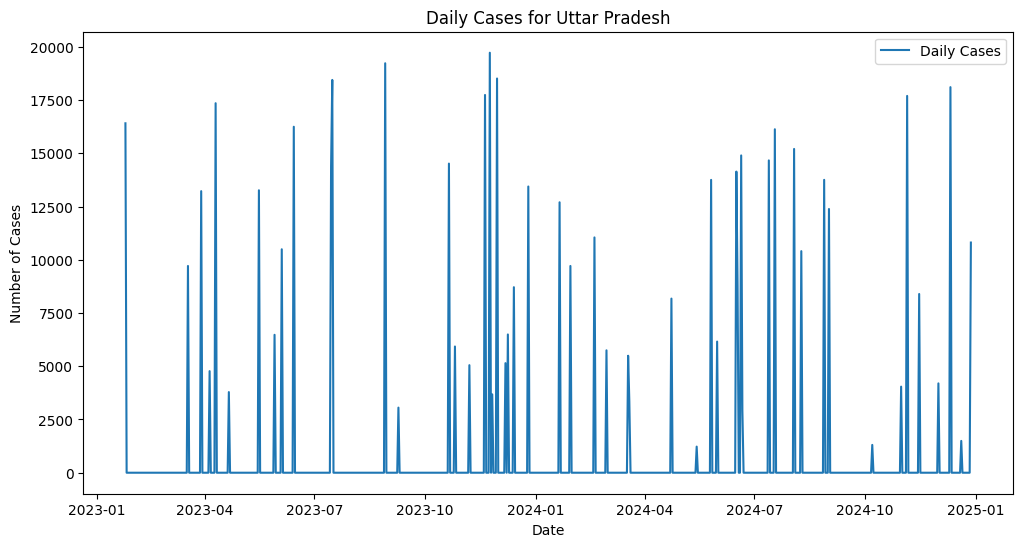

ADF Statistic: -26.611318989260496
p-value: 0.0


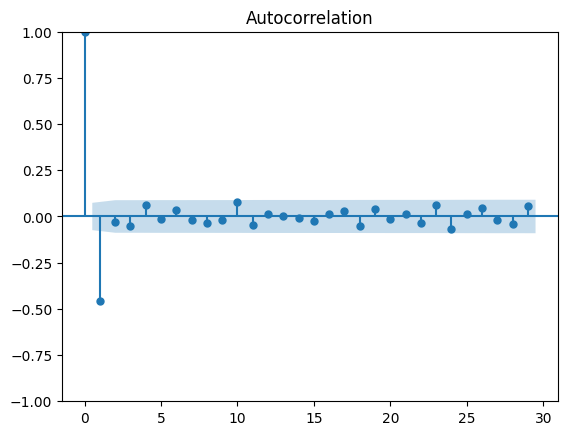

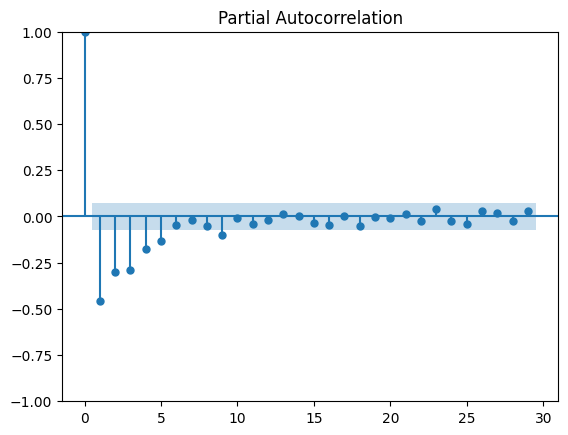

2024-12-29    921.761881
2024-12-30    785.748048
2024-12-31    783.876784
2025-01-01    783.851039
2025-01-02    783.850685
2025-01-03    783.850680
2025-01-04    783.850680
2025-01-05    783.850680
2025-01-06    783.850680
2025-01-07    783.850680
Freq: D, Name: predicted_mean, dtype: float64


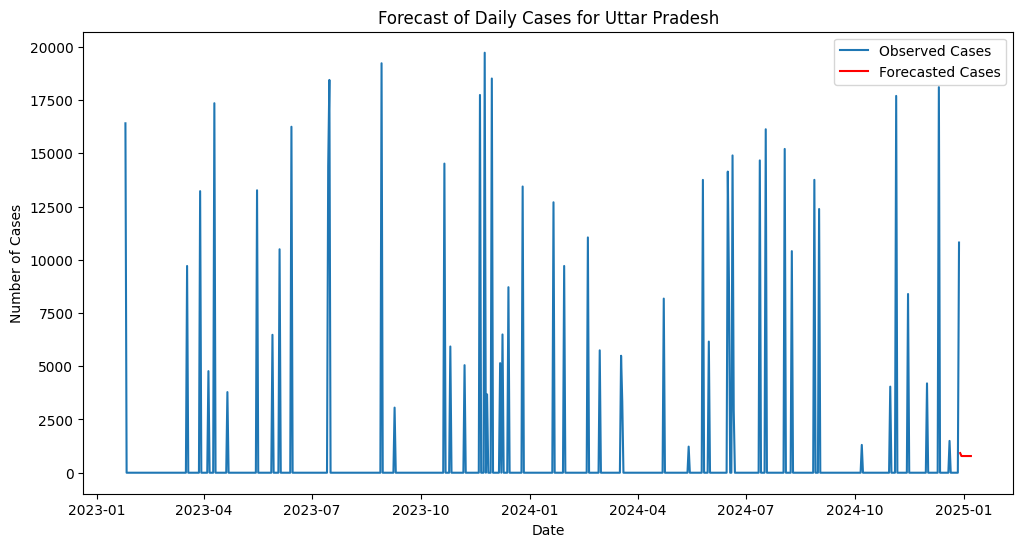

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load your dataset
data = pd.read_csv('/content/epidemic_data_2024.csv', parse_dates=['Date'], index_col='Date')

# Filter for a specific state
state_name = 'Uttar Pradesh'  # Replace with the state you're interested in
state_data = data[data['State'] == state_name]

# Group by date and sum cases
daily_cases = state_data.resample('D')['Cases'].sum()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(daily_cases, label='Daily Cases')
plt.title(f'Daily Cases for {state_name}')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

# Check for stationarity
result = adfuller(daily_cases)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If not stationary, differencing may be needed
daily_cases_diff = daily_cases.diff().dropna()

# ACF and PACF plots
plot_acf(daily_cases_diff)
plot_pacf(daily_cases_diff)
plt.show()

# Fit ARIMA model (replace p, d, q with identified values)
p, d, q = 1, 1, 1  # Example values; use your analysis to determine these
model = ARIMA(daily_cases, order=(p, d, q))
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=10)  # Forecast the next 10 days
print(forecast)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_cases, label='Observed Cases')
plt.plot(forecast.index, forecast, label='Forecasted Cases', color='red')
plt.title(f'Forecast of Daily Cases for {state_name}')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


 Vector Autoregression (VAR)

Description: A multivariate time series model that captures the linear interdependencies among multiple time series.

Use Case: Useful if you want to analyze the relationship between different states or factors influencing the epidemic.

In [ ]:
pip install pandas numpy statsmodels matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# Load your dataset
data = pd.read_csv('/content/epidemic_data_2024.csv', parse_dates=['Date'], index_col='Date')

# Pivot the data to create a multivariate time series
pivot_data = data.pivot_table(index='Date', columns='State', values='Cases', aggfunc='sum')

# Fill missing values (if any)
pivot_data.fillna(0, inplace=True)

# Check for stationarity and difference if necessary
def check_stationarity(series):
    result = adfuller(series)
    return result[1] <= 0.05  # p-value < 0.05 indicates stationarity

# Check stationarity for each state and apply differencing if needed
for state in pivot_data.columns:
    if not check_stationarity(pivot_data[state]):
        print(f"{state} is not stationary. Differencing...")
        pivot_data[state] = pivot_data[state].diff().dropna()

# Drop any NaN values created by differencing
pivot_data.dropna(inplace=True)

# Fit the VAR model
# Reduced maxlags to potentially avoid overfitting
model = VAR(pivot_data)

# Manually select a smaller lag order to start with
# This will help determine if the automatic lag selection was the issue
# If the automatic selection resulted in k_ar = 0, try increasing the maxlags value gradually
model_fit = model.fit(maxlags=5, ic='aic')

# Print model summary to examine the estimated coefficients and model fit
print(model_fit.summary())

# Make forecasts
forecast_steps = 10  # Forecast the next 10 days

# Check if model_fit.k_ar is greater than 0 before using it
# This prevents the negative indexing issue if k_ar is 0
if model_fit.k_ar > 0:
    forecast = model_fit.forecast(pivot_data.values[-model_fit.k_ar:], steps=forecast_steps)
else:
    # If k_ar is 0, it means no lags were selected
    # Handle this case by setting k_ar to a small value (e.g., 1)
    # This assumes at least one lag is relevant for forecasting
    print("Warning: No lags were selected by the model. Using k_ar = 1 for forecasting.")

    # Set k_ar to 1 manually
    model_fit.k_ar = 1


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 13, Dec, 2024
Time:                     14:10:44
--------------------------------------------------------------------
No. of Equations:         17.0000    BIC:                    269.340
Nobs:                     731.000    HQIC:                   269.274
Log likelihood:          -116021.    FPE:               8.43958e+116
AIC:                      269.233    Det(Omega_mle):    8.24571e+116
--------------------------------------------------------------------
Results for equation Andhra Pradesh
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const       531.798906        94.997038            5.598           0.000

Results for equation Bihar
           coefficient       std. error           t-stat            prob
-------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


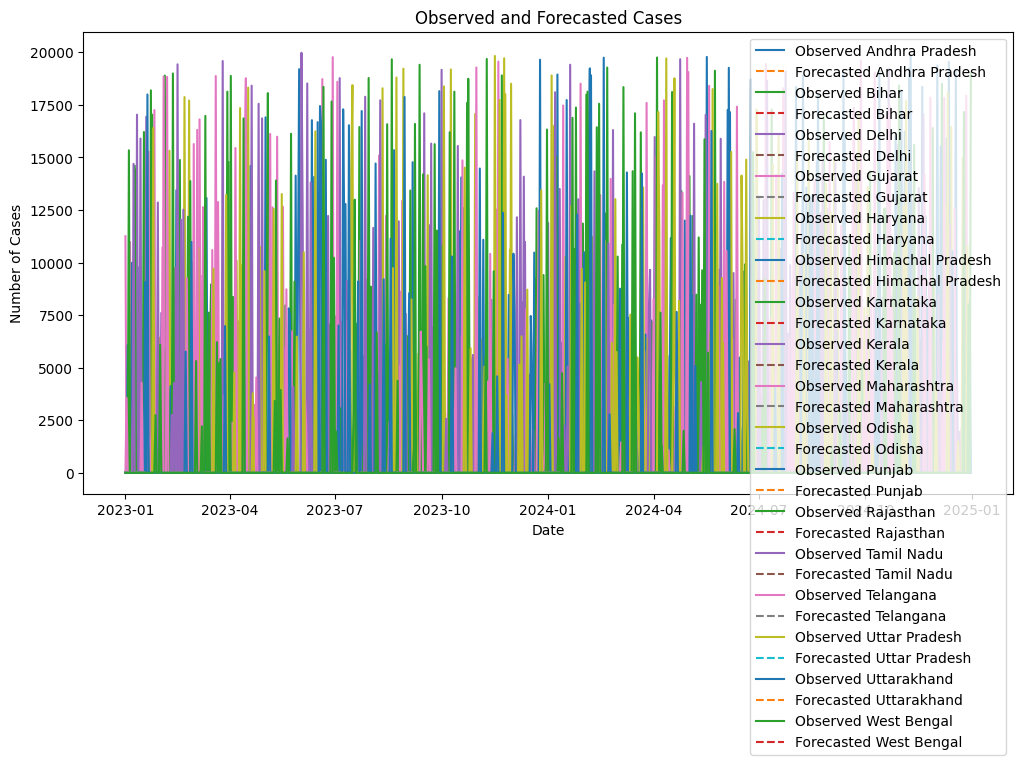

In [ ]:
forecast_steps = 10  # Forecast the next 10 days
#forecast = model_fit.forecast(pivot_data.values[-model_fit.k_ar:], steps=forecast_steps)

forecast_index = pd.date_range(start=pivot_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=pivot_data.columns)

# Plot observed and forecasted values
plt.figure(figsize=(12, 6))
for state in pivot_data.columns:
    plt.plot(pivot_data[state], label=f'Observed {state}')
    plt.plot(forecast_df[state], label=f'Forecasted {state}', linestyle='--')

plt.title('Observed and Forecasted Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

Loading Data: The dataset is loaded with the date column parsed.

Pivoting the Data: The data is reshaped into a format where each state's cases are in separate columns.

Feature Creation: Lagged features are created to help the model learn from previous values of each state.

Splitting Data: The data is split into training and testing sets.

Training the Model: A Random Forest Regressor is trained for each state, and predictions are made on the test set.

Model Evaluation: Mean Squared Error (MSE) and R-squared (R²) metrics are printed for each state to assess model performance.

Plotting: The actual vs. predicted cases for a selected state are plotted for visual comparison

<ipython-input-6-800c8d09a3fa>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{state}_lag{lag}'] = df[state].shift(lag)
<ipython-input-6-800c8d09a3fa>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{state}_lag{lag}'] = df[state].shift(lag)
<ipython-input-6-800c8d09a3fa>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

Andhra Pradesh - MSE: 7284797.82, R^2: -0.25
Bihar - MSE: 3718284.59, R^2: -0.78
Delhi - MSE: 8259249.72, R^2: -0.18
Gujarat - MSE: 11364683.36, R^2: -0.15
Haryana - MSE: 6528552.19, R^2: -0.06
Himachal Pradesh - MSE: 3600215.95, R^2: -0.81
Karnataka - MSE: 12334855.42, R^2: 0.01
Kerala - MSE: 11246818.97, R^2: -0.06
Maharashtra - MSE: 8837267.07, R^2: -0.27
Odisha - MSE: 23417157.12, R^2: -0.13
Punjab - MSE: 6492025.37, R^2: -0.21
Rajasthan - MSE: 10048923.73, R^2: -0.24
Tamil Nadu - MSE: 8318248.03, R^2: -0.18
Telangana - MSE: 6737774.21, R^2: -0.45
Uttar Pradesh - MSE: 17351227.77, R^2: -0.18
Uttarakhand - MSE: 7556945.83, R^2: -0.15
West Bengal - MSE: 9484068.21, R^2: -0.24
Andhra Pradesh_lag1 - MSE: 113406.50, R^2: 0.98
Bihar_lag1 - MSE: 17863.02, R^2: 1.00
Delhi_lag1 - MSE: 44567.32, R^2: 0.99
Gujarat_lag1 - MSE: 26370.02, R^2: 1.00
Haryana_lag1 - MSE: 26213.62, R^2: 0.99
Himachal Pradesh_lag1 - MSE: 44959.28, R^2: 0.99
Karnataka_lag1 - MSE: 8596.74, R^2: 1.00
Kerala_lag1 - MSE: 

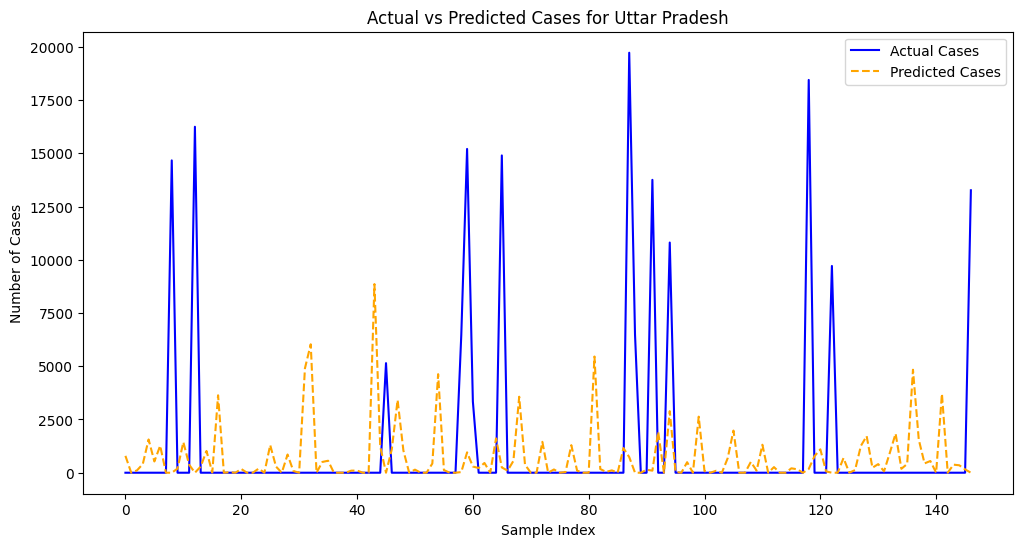

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('/content/epidemic_data_2024.csv', parse_dates=['Date'])

# Pivot the data to create a multivariate time series
# Assuming your data has 'State', 'Date', and 'Cases' columns
pivot_data = data.pivot_table(index='Date', columns='State', values='Cases', aggfunc='sum')

# Fill missing values (if any)
pivot_data.fillna(0, inplace=True)

# Create features (lagged values) and target
def create_features(df, n_lags=3):
    for lag in range(1, n_lags + 1):
        for state in df.columns:
            df[f'{state}_lag{lag}'] = df[state].shift(lag)
    # Instead of dropna, fill NaN with 0 to avoid empty DataFrame
    # This is the fix: filling NaN values with 0 instead of dropping them
    return df.fillna(0)

# Create features
feature_data = create_features(pivot_data)

# Split the data into features and target
# This is the fix: selecting appropriate columns for X
X = feature_data[[col for col in feature_data.columns if '_lag' in col]]
y = feature_data[pivot_data.columns]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor for each state
models = {}
predictions = {}
for state in y.columns:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train[state])
    predictions[state] = model.predict(X_test)
    models[state] = model

    # Evaluate the model
    mse = mean_squared_error(y_test[state], predictions[state])
    r2 = r2_score(y_test[state], predictions[state])
    print(f'{state} - MSE: {mse:.2f}, R^2: {r2:.2f}')

# Plotting actual vs predicted values for a selected state
selected_state = 'Uttar Pradesh'  # Replace with your state name
plt.figure(figsize=(12, 6))
plt.plot(y_test[selected_state].values, label='Actual Cases', color='blue')
plt.plot(predictions[selected_state], label='Predicted Cases', color='orange', linestyle='--')
plt.title(f'Actual vs Predicted Cases for {selected_state}')
plt.xlabel('Sample Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train[selected_state])  # Use a specific state

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best estimator
best_model = grid_search.best_estimator_

# Predictions with the best model
best_predictions = best_model.predict(X_test)

# Evaluate the best model
best_mse = mean_squared_error(y_test[selected_state], best_predictions)
best_r2 = r2_score(y_test[selected_state], best_predictions)
print(f'Best Model - {selected_state} - MSE: {best_mse:.2f}, R^2: {best_r2:.2f}')


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Model - Uttar Pradesh - MSE: 17265930.39, R^2: -0.17


In [ ]:
data.columns

Index(['State', 'Date', 'Cases', 'Recoveries', 'Mortality Rate (%)',
       'Population', 'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
       'Infection Rate (%)', 'Healthcare Facilities', 'Average Age',
       'Urbanization Rate (%)', 'Mobility Index', 'Cleanliness Ratio',
       'Disease Awareness Programs', 'Latitude ', 'Longitude '],
      dtype='object')

In [ ]:
data.Cases.describe()

,Cases
count,731.000000
mean,10491.491108
std,5635.801821
min,1020.000000
25%,5486.500000
50%,10294.000000
75%,15619.500000
max,19982.000000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset
data = pd.read_csv('/content/epidemic_data_2024.csv')

# Check the columns
print(data.columns)

# Create the Epidemic_Type column based on Cases
low_threshold = data['Cases'].quantile(0.25)  # 25th percentile
high_threshold = data['Cases'].quantile(0.75)  # 75th percentile

conditions = [
    (data['Cases'] < low_threshold),
    (data['Cases'] >= low_threshold) & (data['Cases'] < high_threshold),
    (data['Cases'] >= high_threshold)
]
choices = [0, 1, 2]  # 0: Low, 1: Moderate, 2: High
data['Epidemic_Type'] = np.select(conditions, choices, default=-1)

# Define features and target variable
X = data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
           'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
           'Infection Rate (%)', 'Healthcare Facilities',
           'Average Age', 'Urbanization Rate (%)',
           'Mobility Index', 'Cleanliness Ratio',
           'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
y = data['Epidemic_Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Example: Predicting for a specific state
new_data = pd.DataFrame({
    'Cases': [1500],
    'Recoveries': [1200],
    'Mortality Rate (%)': [2.5],
    'Population': [1000000],
    'Vaccination Rate (%)': [70],
    'Testing Rate (per 1,000)': [50],
    'Infection Rate (%)': [5],
    'Healthcare Facilities': [25],
    'Average Age': [30],
    'Urbanization Rate (%)': [60],
    'Mobility Index': [0.75],
    'Cleanliness Ratio': [0.85],
    'Disease Awareness Programs': [3],
    'Latitude ': [26.8467],
    'Longitude ': [80.9462]
})

predicted_epidemic = rf_classifier.predict(new_data)
print(f'Predicted Epidemic Type: {predicted_epidemic[0]}')

Index(['State', 'Date', 'Cases', 'Recoveries', 'Mortality Rate (%)',
       'Population', 'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
       'Infection Rate (%)', 'Healthcare Facilities', 'Average Age',
       'Urbanization Rate (%)', 'Mobility Index', 'Cleanliness Ratio',
       'Disease Awareness Programs', 'Latitude ', 'Longitude '],
      dtype='object')
[[33  0  0]
 [ 0 68  0]
 [ 0  0 46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        46

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147

Predicted Epidemic Type: 0


In [ ]:
data.State.unique()

array(['Andhra Pradesh', 'Bihar', 'Delhi', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Karnataka', 'Kerala', 'Maharashtra', 'Odisha',
       'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

This code effectively analyzes the spread of an epidemic by classifying states into different epidemic types based on the number of cases. It uses a Random Forest Classifier to predict these types based on various features, evaluates the model's performance, and displays the results. This approach can help public health officials understand the severity of epidemics in different regions and make informed decisions. If you have any specific questions about any part of the code or its functionality, feel free to ask!

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset
data = pd.read_csv('/content/epidemic_data_2024.csv')

# Create the Epidemic_Type column based on Cases
low_threshold = data['Cases'].quantile(0.25)  # 25th percentile
high_threshold = data['Cases'].quantile(0.75)  # 75th percentile

conditions = [
    (data['Cases'] < low_threshold),
    (data['Cases'] >= low_threshold) & (data['Cases'] < high_threshold),
    (data['Cases'] >= high_threshold)
]
choices = [0, 1, 2]  # 0: Low, 1: Moderate, 2: High
data['Epidemic_Type'] = np.select(conditions, choices, default=-1)

# List to store results
results = []

# Loop through each unique state
for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]

    # Check if there are enough samples to train the model
    if len(state_data) < 10:  # Adjust this threshold as needed
        print(f"Not enough data for {state}, skipping.")
        continue

    # Define features and target variable
    X = state_data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
                     'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
                     'Infection Rate (%)', 'Healthcare Facilities',
                     'Average Age', 'Urbanization Rate (%)',
                     'Mobility Index', 'Cleanliness Ratio',
                     'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
    y = state_data['Epidemic_Type']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Fit the model
    rf_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store results
    results.append({
        'State': state,
        'Confusion Matrix': conf_matrix,
        'Classification Report': report
    })

# Display results for each state
for result in results:
    print(f"Results for {result['State']}:")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Classification Report:")
    print(result['Classification Report'])
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Results for Andhra Pradesh:
Confusion Matrix:
[[2 0 0]
 [0 3 0]
 [0 3 0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         3
           2       0.00      0.00      0.00         3

    accuracy                           0.62         8
   macro avg       0.50      0.67      0.56         8
weighted avg       0.44      0.62      0.50         8



Results for Bihar:
Confusion Matrix:
[[2 1 0]
 [0 3 0]
 [0 2 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         3
           2       1.00      0.33      0.50         3

    accuracy                           0.67         9
   macro avg       0.83      0.67      0.66         9
weighted avg       0.83      0.67      0.66         9



Results for Delhi:
Confusion Matrix:
[[1 1 0]
 [0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Loop through each unique state
for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]

    if len(state_data) < 10:  # Adjust as needed
        print(f"Not enough data for {state}, skipping.")
        continue

    X = state_data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
                     'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
                     'Infection Rate (%)', 'Healthcare Facilities',
                     'Average Age', 'Urbanization Rate (%)',
                     'Mobility Index', 'Cleanliness Ratio',
                     'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
    y = state_data['Epidemic_Type']

    # Stratified train-test split
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize the Random Forest Classifier with class weights
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

    # Fit the model
    rf_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)

    # Store results
    results.append({
        'State': state,
        'Confusion Matrix': conf_matrix,
        'Classification Report': report
    })

# Display results for each state
for result in results:
    print(f"Results for {result['State']}:")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Classification Report:")
    print(result['Classification Report'])
    print("\n")

Results for Andhra Pradesh:
Confusion Matrix:
[[2 0 0]
 [0 3 0]
 [0 3 0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         3
           2       0.00      0.00      0.00         3

    accuracy                           0.62         8
   macro avg       0.50      0.67      0.56         8
weighted avg       0.44      0.62      0.50         8



Results for Bihar:
Confusion Matrix:
[[2 1 0]
 [0 3 0]
 [0 2 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         3
           2       1.00      0.33      0.50         3

    accuracy                           0.67         9
   macro avg       0.83      0.67      0.66         9
weighted avg       0.83      0.67      0.66         9



Results for Delhi:
Confusion Matrix:
[[1 1 0]
 [0

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
data = pd.read_csv('/content/epidemic_data_2024.csv')

# Create the Epidemic_Type column based on Cases
low_threshold = data['Cases'].quantile(0.25)  # 25th percentile
high_threshold = data['Cases'].quantile(0.75)  # 75th percentile

conditions = [
    (data['Cases'] < low_threshold),
    (data['Cases'] >= low_threshold) & (data['Cases'] < high_threshold),
    (data['Cases'] >= high_threshold)
]
choices = [0, 1, 2]  # 0: Low, 1: Moderate, 2: High
data['Epidemic_Type'] = np.select(conditions, choices, default=-1)

# List to store results
results = []

# Loop through each unique state
for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]

    # Check if there are enough samples to train the model
    if len(state_data) < 10:  # Adjust this threshold as needed
        print(f"Not enough data for {state}, skipping.")
        continue

    # Define features and target variable
    X = state_data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
                     'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
                     'Infection Rate (%)', 'Healthcare Facilities',
                     'Average Age', 'Urbanization Rate (%)',
                     'Mobility Index', 'Cleanliness Ratio',
                     'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
    y = state_data['Epidemic_Type']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE for handling class imbalance
    smote = SMOTE(random_state=42, k_neighbors=min(5, y_train.value_counts().min() - 1))
# or smote = SMOTE(random_state=42, k_neighbors=1)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Define the neural network model
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_resampled.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(3, activation='softmax')  # Assuming 3 classes for Epidemic_Type
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Fit the model
    model.fit(X_resampled, y_resampled, epochs=50, batch_size=10, validation_split=0.2)

    # Make predictions
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Evaluate the model
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store results
    results.append({
        'State': state,
        'Confusion Matrix': conf_matrix,
        'Classification Report': report
    })

# Display results for each state
for result in results:
    print(f"Results for {result['State']}:")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Classification Report:")
    print(result['Classification Report'])
    print("\n")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.4151 - loss: 22182094.0000 - val_accuracy: 0.0000e+00 - val_loss: 32719940.0000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3918 - loss: 15838847.0000 - val_accuracy: 0.0000e+00 - val_loss: 23241732.0000
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4384 - loss: 9462285.0000 - val_accuracy: 0.0000e+00 - val_loss: 15961486.0000
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4684 - loss: 4242398.0000 - val_accuracy: 0.0000e+00 - val_loss: 9225453.0000
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5005 - loss: 2111278.5000 - val_accuracy: 0.0000e+00 - val_loss: 7535233.0000
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4384 - loss: 2615416.0000 - val_accuracy: 0.0000e+00 - val_loss: 4667399.0000
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3584 - loss: 2459584.0000 - val_accuracy: 0.0000e+00 - val_loss: 233940.5000
Epoch 8/5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3318 - loss: 8958705.0000 - val_accuracy: 0.0000e+00 - val_loss: 8742240.0000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3851 - loss: 6086912.0000 - val_accuracy: 0.0000e+00 - val_loss: 4328128.5000
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4846 - loss: 1494344.1250 - val_accuracy: 0.5000 - val_loss: 1340128.1250
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2486 - loss: 816486.9375 - val_accuracy: 0.5000 - val_loss: 1144211.0000
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2609 - loss: 968142.1250 - val_accuracy: 0.0000e+00 - val_loss: 2527434.0000
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4718 - loss: 1222891.8750 - val_accuracy: 0.0000e+00 - val_loss: 2276384.0000
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4279 - loss: 823146.1875 - val_accuracy: 0.5000 - val_loss: 1193912.3750
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.4048 - loss: 6701124.0000 - val_accuracy: 0.2857 - val_loss: 13312400.0000
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3231 - loss: 6288125.0000 - val_accuracy: 0.1429 - val_loss: 9940698.0000
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3798 - loss: 5099868.5000 - val_accuracy: 0.1429 - val_loss: 5580593.5000
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3356 - loss: 2958359.0000 - val_accuracy: 0.2857 - val_loss: 3013924.0000
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3356 - loss: 1611353.3750 - val_accuracy: 0.1429 - val_loss: 32949.0703
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2154 - loss: 366689.0938 - val_accuracy: 0.5714 - val_loss: 873737.9375
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1971 - loss: 1382238.2500 - val_accuracy: 0.5714 - val_loss: 719011.3125
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.3357 - loss: 12436941.0000 - val_accuracy: 0.3750 - val_loss: 10537686.0000
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2607 - loss: 7485497.5000 - val_accuracy: 0.3750 - val_loss: 5769321.0000
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3964 - loss: 3034545.5000 - val_accuracy: 0.1250 - val_loss: 5088041.0000
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3839 - loss: 3027598.0000 - val_accuracy: 0.1250 - val_loss: 3076159.0000
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3839 - loss: 1935061.7500 - val_accuracy: 0.5000 - val_loss: 628289.8125
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3179 - loss: 1183359.2500 - val_accuracy: 0.5000 - val_loss: 1059587.7500
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3804 - loss: 1483036.3750 - val_accuracy: 0.5000 - val_loss: 618556.5000
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.3518 - loss: 20680742.0000 - val_accuracy: 0.0000e+00 - val_loss: 13111247.0000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4484 - loss: 10510895.0000 - val_accuracy: 0.0000e+00 - val_loss: 6754684.0000
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3484 - loss: 7221937.0000 - val_accuracy: 0.0000e+00 - val_loss: 507837.2500
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3219 - loss: 1061949.5000 - val_accuracy: 0.0000e+00 - val_loss: 1196015.3750
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3084 - loss: 3900425.0000 - val_accuracy: 0.0000e+00 - val_loss: 908132.8125
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3968 - loss: 1260079.8750 - val_accuracy: 0.0000e+00 - val_loss: 421038.0938
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4618 - loss: 1021575.0000 - val_accuracy: 0.0000e+00 - val_loss: 1383403.0000
Epoch 8/50
4/4 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.1640 - loss: 14881622.0000 - val_accuracy: 0.8571 - val_loss: 2522273.7500
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2586 - loss: 5115736.0000 - val_accuracy: 0.0000e+00 - val_loss: 5262601.0000
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4052 - loss: 4107922.0000 - val_accuracy: 0.0000e+00 - val_loss: 3478366.2500
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4492 - loss: 1932998.6250 - val_accuracy: 0.0000e+00 - val_loss: 415281.9375
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3975 - loss: 441094.1250 - val_accuracy: 0.8571 - val_loss: 24117.6250
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2612 - loss: 957126.5625 - val_accuracy: 0.1429 - val_loss: 259533.7812
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2914 - loss: 618278.1250 - val_accuracy: 0.1429 - val_loss: 198093.1094
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.3076 - loss: 1012950.6250 - val_accuracy: 0.0000e+00 - val_loss: 4401068.0000
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4514 - loss: 1110450.0000 - val_accuracy: 0.0000e+00 - val_loss: 2467848.2500
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2211 - loss: 898330.2500 - val_accuracy: 0.0000e+00 - val_loss: 298904.4688
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2101 - loss: 578154.6250 - val_accuracy: 0.0000e+00 - val_loss: 775750.3750
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2558 - loss: 858290.6875 - val_accuracy: 0.0000e+00 - val_loss: 1847495.0000
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4848 - loss: 561869.2500 - val_accuracy: 0.0000e+00 - val_loss: 742456.0000
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4388 - loss: 584207.1250 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50
7/7 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.3782 - loss: 13943050.0000 - val_accuracy: 0.0000e+00 - val_loss: 14428675.0000
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3750 - loss: 4772470.5000 - val_accuracy: 0.1667 - val_loss: 11534563.0000
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3926 - loss: 3619340.0000 - val_accuracy: 0.0000e+00 - val_loss: 6934274.5000
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4699 - loss: 2332161.2500 - val_accuracy: 0.0000e+00 - val_loss: 4742434.0000
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3787 - loss: 1685449.5000 - val_accuracy: 0.1667 - val_loss: 1893940.3750
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3556 - loss: 817050.3750 - val_accuracy: 0.8333 - val_loss: 201818.0781
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2556 - loss: 834635.1875 - val_accuracy: 0.0000e+00 - val_loss: 653738.8125
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.4222 - loss: 4249822.5000 - val_accuracy: 0.0000e+00 - val_loss: 2083610.5000
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2819 - loss: 822049.0625 - val_accuracy: 0.0000e+00 - val_loss: 47670.6680
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4486 - loss: 404440.9688 - val_accuracy: 0.0000e+00 - val_loss: 257637.0469
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4361 - loss: 247721.5312 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3597 - loss: 231433.5000 - val_accuracy: 0.0000e+00 - val_loss: 116473.3516
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3500 - loss: 225811.5625 - val_accuracy: 0.0000e+00 - val_loss: 63760.4570
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3597 - loss: 208799.4375 - val_accuracy: 0.0000e+00 - val_loss: 118864.0391
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2700 - loss: 4144347.0000 - val_accuracy: 0.7273 - val_loss: 831198.1875
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2011 - loss: 917957.8750 - val_accuracy: 0.0000e+00 - val_loss: 1604048.3750
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3971 - loss: 580164.6875 - val_accuracy: 0.0000e+00 - val_loss: 2020591.5000
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2053 - loss: 591844.5625 - val_accuracy: 0.0000e+00 - val_loss: 1720242.8750
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3929 - loss: 644752.6875 - val_accuracy: 0.0000e+00 - val_loss: 702526.9375
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2176 - loss: 232559.4844 - val_accuracy: 0.7273 - val_loss: 35263.3398
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3329 - loss: 199923.4219 - val_accuracy: 0.0000e+00 - val_loss: 281665.4375
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.3606 - loss: 5927861.0000 - val_accuracy: 0.2857 - val_loss: 9608722.0000
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4750 - loss: 4035731.7500 - val_accuracy: 0.0000e+00 - val_loss: 8453779.0000
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3865 - loss: 4527951.0000 - val_accuracy: 0.0000e+00 - val_loss: 6426956.5000
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4865 - loss: 2568250.0000 - val_accuracy: 0.0000e+00 - val_loss: 3989563.7500
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3865 - loss: 2040151.7500 - val_accuracy: 0.0000e+00 - val_loss: 1125710.3750
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3413 - loss: 518831.2812 - val_accuracy: 0.7143 - val_loss: 22536.2148
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3673 - loss: 729706.1250 - val_accuracy: 0.2857 - val_loss: 212016.4219
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.4639 - loss: 2694936.7500 - val_accuracy: 0.0000e+00 - val_loss: 998545.5000
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4542 - loss: 1079129.3750 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1486 - loss: 993094.2500 - val_accuracy: 0.0000e+00 - val_loss: 698169.8750
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4611 - loss: 695506.6875 - val_accuracy: 0.0000e+00 - val_loss: 1607883.8750
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3792 - loss: 862827.6250 - val_accuracy: 0.0000e+00 - val_loss: 1429929.0000
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4000 - loss: 834737.2500 - val_accuracy: 0.0000e+00 - val_loss: 471992.7812
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2722 - loss: 511284.4375 - val_accuracy: 0.0000e+00 - val_loss: 91674.1250
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5303 - loss: 4228293.0000 - val_accuracy: 0.0000e+00 - val_loss: 17666120.0000
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3542 - loss: 3552376.2500 - val_accuracy: 0.0000e+00 - val_loss: 11092876.0000
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3998 - loss: 2268570.5000 - val_accuracy: 0.0000e+00 - val_loss: 7050125.0000
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4326 - loss: 1342693.3750 - val_accuracy: 0.0000e+00 - val_loss: 3668620.2500
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4340 - loss: 805758.7500 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1217 - loss: 452208.7812 - val_accuracy: 0.0000e+00 - val_loss: 107418.7188
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4409 - loss: 248162.0938 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.1532 - loss: 11761682.0000 - val_accuracy: 0.0000e+00 - val_loss: 254990.7969
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4426 - loss: 1102743.2500 - val_accuracy: 0.0000e+00 - val_loss: 7951180.0000
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4204 - loss: 2404761.5000 - val_accuracy: 0.0000e+00 - val_loss: 7089852.0000
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4671 - loss: 1923927.5000 - val_accuracy: 0.0000e+00 - val_loss: 5664804.0000
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4810 - loss: 1115727.0000 - val_accuracy: 0.0000e+00 - val_loss: 3950713.2500
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5403 - loss: 572300.2500 - val_accuracy: 0.0000e+00 - val_loss: 1540165.0000
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4662 - loss: 226595.9531 - val_accuracy: 0.0000e+00 - val_loss: 497872.3438
Epoch 8/50
5/5 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4109 - loss: 7607505.5000 - val_accuracy: 0.0000e+00 - val_loss: 5504201.5000
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4176 - loss: 3701880.5000 - val_accuracy: 0.0000e+00 - val_loss: 1379462.1250
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3589 - loss: 1479262.2500 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1912 - loss: 414231.2500 - val_accuracy: 0.0000e+00 - val_loss: 1170767.3750
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4482 - loss: 482237.0312 - val_accuracy: 0.0000e+00 - val_loss: 973863.5000
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4042 - loss: 164315.9844 - val_accuracy: 0.0000e+00 - val_loss: 576762.5000
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4544 - loss: 104947.5859 - val_accuracy: 0.0000e+00 - val_loss: 300754.9375
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.2500 - loss: 5353716.5000 - val_accuracy: 0.5455 - val_loss: 965977.6250
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2767 - loss: 1911567.0000 - val_accuracy: 0.0000e+00 - val_loss: 3625540.2500
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3733 - loss: 1907366.8750 - val_accuracy: 0.4545 - val_loss: 869494.7500
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3333 - loss: 628979.8125 - val_accuracy: 0.5455 - val_loss: 269866.6875
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4467 - loss: 570750.0625 - val_accuracy: 0.0000e+00 - val_loss: 1182218.8750
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4900 - loss: 542626.8750 - val_accuracy: 0.4545 - val_loss: 994487.2500
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3600 - loss: 389604.5312 - val_accuracy: 0.0000e+00 - val_loss: 278583.6250
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.3748 - loss: 3186826.7500 - val_accuracy: 0.2500 - val_loss: 5255162.0000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2861 - loss: 1687249.3750 - val_accuracy: 0.7500 - val_loss: 82432.3750
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2108 - loss: 261385.6719 - val_accuracy: 0.2500 - val_loss: 1036671.1875
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3553 - loss: 596396.8125 - val_accuracy: 0.0000e+00 - val_loss: 42090.1250
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4777 - loss: 186132.3125 - val_accuracy: 0.0000e+00 - val_loss: 455252.8750
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3757 - loss: 194752.0312 - val_accuracy: 0.7500 - val_loss: 113088.8750
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2570 - loss: 327347.6562 - val_accuracy: 0.2500 - val_loss: 790823.6875
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
data = pd.read_csv('/content/epidemic_data_2024.csv')

# Create the Epidemic_Type column based on Cases
low_threshold = data['Cases'].quantile(0.25)  # 25th percentile
high_threshold = data['Cases'].quantile(0.75)  # 75th percentile

conditions = [
    (data['Cases'] < low_threshold),
    (data['Cases'] >= low_threshold) & (data['Cases'] < high_threshold),
    (data['Cases'] >= high_threshold)
]
choices = [0, 1, 2]  # 0: Low, 1: Moderate, 2: High
data['Epidemic_Type'] = np.select(conditions, choices, default=-1)

# List to store results
results = []

# Loop through each unique state
for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]

    # Check if there are enough samples to train the model
    if len(state_data) < 10:  # Adjust this threshold as needed
        print(f"Not enough data for {state}, skipping.")
        continue

    # Define features and target variable
    X = state_data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
                     'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
                     'Infection Rate (%)', 'Healthcare Facilities',
                     'Average Age', 'Urbanization Rate (%)',
                     'Mobility Index', 'Cleanliness Ratio',
                     'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
    y = state_data['Epidemic_Type']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE for handling class imbalance
    smote = SMOTE(random_state=42, k_neighbors=min(5, y_train.value_counts().min() - 1))
# or smote = SMOTE(random_state=42, k_neighbors=1)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # 1. Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_resampled, y_resampled)
    y_pred_rf = rf_model.predict(X_test)
    print(f"Random Forest Results for {state}:")
    print(confusion_matrix(y_test, y_pred_rf))
    print(classification_report(y_test, y_pred_rf))

    # 2. Gradient Boosting
    gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb_model.fit(X_resampled, y_resampled)
    y_pred_gb = gb_model.predict(X_test)
    print(f"Gradient Boosting Results for {state}:")
    print(confusion_matrix(y_test, y_pred_gb))
    print(classification_report(y_test, y_pred_gb))

    # 3. XGBoost
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    xgb_model.fit(X_resampled, y_resampled)
    y_pred_xgb = xgb_model.predict(X_test)
    print(f"XGBoost Results for {state}:")
    print(confusion_matrix(y_test, y_pred_xgb))
    print(classification_report(y_test, y_pred_xgb))

    # 4. Convolutional Neural Network (CNN)
    # Reshape your data for CNN
    X_train_cnn = X_resampled.values.reshape(-1, X_resampled.shape[1], 1)
    X_test_cnn = X_test.values.reshape(-1, X_test.shape[1], 1)

    cnn_model = keras.Sequential([
        layers.Conv1D(32, 2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(3, activation='softmax')  # Assuming 3 classes
    ])

    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    cnn_model.fit(X_train_cnn, y_resampled, epochs=50, batch_size=10, validation_split=0.2)
    y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
    print(f"CNN Results for {state}:")
    print(confusion_matrix(y_test, y_pred_cnn))
    print(classification_report(y_test, y_pred_cnn))

    # 5. Recurrent Neural Network (RNN)
    # Reshape your data for RNN
    X_train_rnn = X_resampled.values.reshape(-1, X_resampled.shape[1], 1)
    X_test_rnn = X_test.values.reshape(-1, X_test.shape[1], 1)

    rnn_model = keras.Sequential([
        layers.SimpleRNN(32, input_shape=(X_train_rnn.shape[1], 1)),
        layers.Dense(64, activation='relu'),
        layers.Dense(3, activation='softmax')  # Assuming 3 classes
    ])

    rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    rnn_model.fit(X_train_rnn, y_resampled, epochs=50, batch_size=10, validation_split=0.2)
    y_pred_rnn = np.argmax(rnn_model.predict(X_test_rnn), axis=1)
    print(f"RNN Results for {state}:")
    print(confusion_matrix(y_test, y_pred_rnn))
    print(classification_report(y_test, y_pred_rnn))


Random Forest Results for Andhra Pradesh:
[[2 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Gradient Boosting Results for Andhra Pradesh:
[[2 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

XGBoost Results for Andhra Pradesh:
[[2 0 0]
 [0 3 0]
 [0 0 3]]
              precision    rec

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:42:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.4556 - loss: 4205332.0000 - val_accuracy: 0.0000e+00 - val_loss: 4466659.0000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3219 - loss: 2130273.0000 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2525 - loss: 658257.5625 - val_accuracy: 0.0000e+00 - val_loss: 2571373.2500
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4151 - loss: 756028.3125 - val_accuracy: 0.0000e+00 - val_loss: 3048314.2500
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4284 - loss: 657112.8125 - val_accuracy: 0.0000e+00 - val_loss: 2211465.7500
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4756 - loss: 515526.8438 - val_accuracy: 0.0000e+00 - val_loss: 676444.7500
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3025 - loss: 648745.3125 - val_accuracy: 0.0000e+00 - val_loss: 641512.8750
Epoch 8/50
4/4 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.3030 - loss: 1.0485 - val_accuracy: 0.0000e+00 - val_loss: 1.7250
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4884 - loss: 0.9879 - val_accuracy: 0.0000e+00 - val_loss: 1.9571
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2119 - loss: 1.0149 - val_accuracy: 0.0000e+00 - val_loss: 1.9470
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3651 - loss: 1.0368 - val_accuracy: 0.0000e+00 - val_loss: 1.8618
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4651 - loss: 1.0074 - val_accuracy: 0.0000e+00 - val_loss: 1.8144
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3784 - loss: 1.0157 - val_accuracy: 0.0000e+00 - val_loss: 1.7953
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4418 - loss: 1.0296 - val_accuracy: 0.0000e+00 - val_loss: 1.7803
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3779 - loss: 1.0385 - val_accuracy: 0.0000e+

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         3
           2       1.00      0.33      0.50         3

    accuracy                           0.67         9
   macro avg       0.83      0.67      0.66         9
weighted avg       0.83      0.67      0.66         9

Gradient Boosting Results for Bihar:
[[3 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:42:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


XGBoost Results for Bihar:
[[3 0 0]
 [0 3 0]
 [0 1 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.75      1.00      0.86         3
           2       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      0.89         9

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.2858 - loss: 15755463.0000 - val_accuracy: 0.5000 - val_loss: 8564116.0000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2991 - loss: 7755528.0000 - val_accuracy: 0.5000 - val_loss: 4567028.0000
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3351 - loss: 3639067.7500 - val_accuracy: 0.0000e+00 - val_loss: 5679923.0000
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4551 - loss: 2352807.2500 - val_accuracy: 0.0000e+00 - val_loss: 3185155.2500
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.3818 - loss: 1.1983 - val_accuracy: 0.0000e+00 - val_loss: 1.2390
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4751 - loss: 1.0663 - val_accuracy: 0.0000e+00 - val_loss: 1.1852
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4651 - loss: 1.0786 - val_accuracy: 0.0000e+00 - val_loss: 1.1851
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4651 - loss: 1.0757 - val_accuracy: 0.0000e+00 - val_loss: 1.2209
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3818 - loss: 1.0939 - val_accuracy: 0.0000e+00 - val_loss: 1.2086
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4151 - loss: 1.0865 - val_accuracy: 0.0000e+00 - val_loss: 1.2498
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4151 - loss: 1.0861 - val_accuracy: 0.0000e+00 - val_loss: 1.2711
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4151 - loss: 1.0865 - val_accuracy: 0.0000e+

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Gradient Boosting Results for Delhi:
[[1 1 0]
 [0 3 0]
 [0 0 2]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         2

    accuracy                           0.86         7
   macro avg       0.92      0.83      0.84         7
weighted avg       0.89      0.86      0.84         7

XGBoost Results for Delhi:
[[2 0 0]
 [0 3 0]
 [0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:42:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.4173 - loss: 2417582.7500 - val_accuracy: 0.1429 - val_loss: 2792982.5000
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4298 - loss: 2065212.3750 - val_accuracy: 0.1429 - val_loss: 3336111.5000
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3481 - loss: 1915792.6250 - val_accuracy: 0.2857 - val_loss: 1111850.3750
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3481 - loss: 994680.2500 - val_accuracy: 0.5714 - val_loss: 783169.6250
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1644 - loss: 1199505.3750 - val_accuracy: 0.1429 - val_loss: 1607781.7500
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3923 - loss: 868563.9375 - val_accuracy: 0.5714 - val_loss: 463955.2188
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2779 - loss: 858184.5000 - val_accuracy: 0.2857 - val_loss: 734706.0625
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - accuracy: 0.2846 - loss: 1.7396 - val_accuracy: 0.5714 - val_loss: 1.1149
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2721 - loss: 1.4326 - val_accuracy: 0.5714 - val_loss: 1.0877
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2471 - loss: 1.3179 - val_accuracy: 0.1429 - val_loss: 1.1226
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4673 - loss: 1.0923 - val_accuracy: 0.1429 - val_loss: 1.1933
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3798 - loss: 1.1022 - val_accuracy: 0.1429 - val_loss: 1.2383
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3923 - loss: 1.0893 - val_accuracy: 0.1429 - val_loss: 1.2859
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.2346 - loss: 1.1266 - val_accuracy: 0.2857 - val_loss: 1.3095
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3481 - loss: 1.1270 - val_accuracy: 0.2857 - val_loss: 1.3208
Epoch 9/50

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Results for Gujarat:
[[3 0]
 [0 5]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

XGBoost Results for Gujarat:
[[3 0]
 [1 4]]
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:42:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.4214 - loss: 3539477.0000 - val_accuracy: 0.5000 - val_loss: 720594.2500
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2125 - loss: 1375542.2500 - val_accuracy: 0.3750 - val_loss: 1878928.7500
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2982 - loss: 2153540.2500 - val_accuracy: 0.5000 - val_loss: 487288.5625
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3179 - loss: 1104188.6250 - val_accuracy: 0.1250 - val_loss: 382392.8750
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3089 - loss: 547791.3750 - val_accuracy: 0.1250 - val_loss: 535061.2500
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3732 - loss: 342102.0312 - val_accuracy: 0.3750 - val_loss: 345173.3125
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3107 - loss: 558144.2500 - val_accuracy: 0.5000 - val_loss: 266134.0312
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 600ms/step - accuracy: 0.3464 - loss: 1.1848 - val_accuracy: 0.1250 - val_loss: 1.1456
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3964 - loss: 1.0860 - val_accuracy: 0.1250 - val_loss: 1.1863
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3839 - loss: 1.0956 - val_accuracy: 0.1250 - val_loss: 1.2024
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3714 - loss: 1.1005 - val_accuracy: 0.1250 - val_loss: 1.1996
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4089 - loss: 1.0938 - val_accuracy: 0.1250 - val_loss: 1.1984
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3964 - loss: 1.1159 - val_accuracy: 0.1250 - val_loss: 1.1852
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4589 - loss: 1.0760 - val_accuracy: 0.1250 - val_loss: 1.1803
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3964 - loss: 1.0916 - val_accuracy: 0.1250 - val_loss: 1.1499

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Gradient Boosting Results for Haryana:
[[3 0]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

XGBoost Results for Haryana:
[[3 0]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3802 - loss: 4843565.0000 - val_accuracy: 0.0000e+00 - val_loss: 7643770.5000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3851 - loss: 2790972.0000 - val_accuracy: 0.0000e+00 - val_loss: 4464389.0000
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3746 - loss: 1024835.8750 - val_accuracy: 0.0000e+00 - val_loss: 1603576.0000
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3447 - loss: 873027.7500 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2796 - loss: 279430.1875 - val_accuracy: 0.0000e+00 - val_loss: 1440036.8750
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5333 - loss: 475049.6875 - val_accuracy: 0.0000e+00 - val_loss: 1926390.3750
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4084 - loss: 568364.5625 - val_accuracy: 0.0000e+00 - val_loss: 1590163.3750
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.4318 - loss: 1.0381 - val_accuracy: 0.0000e+00 - val_loss: 1.8365
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2825 - loss: 1.0987 - val_accuracy: 0.0000e+00 - val_loss: 1.8256
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5095 - loss: 1.0191 - val_accuracy: 0.0000e+00 - val_loss: 1.8717
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4084 - loss: 1.0405 - val_accuracy: 0.0000e+00 - val_loss: 1.8953
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3674 - loss: 1.0169 - val_accuracy: 0.0000e+00 - val_loss: 1.9435
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3946 - loss: 1.0265 - val_accuracy: 0.0000e+00 - val_loss: 1.9060
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4418 - loss: 0.9983 - val_accuracy: 0.0000e+00 - val_loss: 1.8803
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3335 - loss: 1.0360 - val_accuracy: 0.0000e+0

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results for Himachal Pradesh:
[[2 0 0]
 [1 7 0]
 [0 0 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00         1

    accuracy                           0.91        11
   macro avg       0.89      0.96      0.91        11
weighted avg       0.94      0.91      0.92        11

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4523 - loss: 8156151.0000 - val_accuracy: 0.0000e+00 - val_loss: 6461399.0000
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4101 - loss: 2190980.5000 - val_accuracy: 0.1429 - val_loss: 2432212.7500
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3849 - loss: 1919323.2500 - val_accuracy: 0.8571 - val_loss: 210150.2500
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2312 - loss: 935453.8125 - val_accuracy: 0.0000e+00 - val_loss: 1721035.1250
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4202 - loss: 525878.0000 - val_accuracy: 0.1429 - val_loss: 1856643.1250
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3443 - loss: 370571.9375 - val_accuracy: 0.1429 - val_loss: 347999.0312
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2366 - loss: 646974.5625 - val_accuracy: 0.1429 - val_loss: 572830.1875
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.3927 - loss: 1.0546 - val_accuracy: 0.0000e+00 - val_loss: 1.6730
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3606 - loss: 1.0636 - val_accuracy: 0.1429 - val_loss: 1.6163
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3622 - loss: 1.0737 - val_accuracy: 0.0000e+00 - val_loss: 1.5563
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3860 - loss: 1.0142 - val_accuracy: 0.1429 - val_loss: 1.4645
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3777 - loss: 1.0761 - val_accuracy: 0.0000e+00 - val_loss: 1.3456
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4039 - loss: 1.0560 - val_accuracy: 0.0000e+00 - val_loss: 1.5096
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3666 - loss: 1.0529 - val_accuracy: 0.0000e+00 - val_loss: 1.7043
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4166 - loss: 1.1118 - val_accuracy: 0.0000e+00 - val_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Results for Karnataka:
[[1 2 0]
 [0 5 0]
 [0 2 1]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.56      1.00      0.71         5
           2       1.00      0.33      0.50         3

    accuracy                           0.64        11
   macro avg       0.85      0.56      0.57        11
weighted avg       0.80      0.64      0.60        11

Gradient Boosting Results for Karnataka:
[[3 0 0]
 [0 5 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

XGBoost Results for Karnataka:
[[3 0 0]
 [0 5 0]
 [0 0 3]]
              precision    recall  f1-score  

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:43:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2048 - loss: 3469263.7500 - val_accuracy: 0.0000e+00 - val_loss: 3661913.5000
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3358 - loss: 915361.8750 - val_accuracy: 0.0000e+00 - val_loss: 804826.8750
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3918 - loss: 441389.3125 - val_accuracy: 0.0000e+00 - val_loss: 786106.3750
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3827 - loss: 316006.3438 - val_accuracy: 0.0000e+00 - val_loss: 511013.9375
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4411 - loss: 465327.6562 - val_accuracy: 0.0000e+00 - val_loss: 1716575.5000
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2882 - loss: 696313.0000 - val_accuracy: 0.0000e+00 - val_loss: 1537878.2500
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4373 - loss: 315258.2500 - val_accuracy: 0.0000e+00 - val_loss: 414289.4688
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.1639 - loss: 1.3987 - val_accuracy: 1.0000 - val_loss: 0.9399
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3561 - loss: 1.1414 - val_accuracy: 0.0000e+00 - val_loss: 1.4328
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4440 - loss: 1.0370 - val_accuracy: 0.0000e+00 - val_loss: 1.7900
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4040 - loss: 1.0560 - val_accuracy: 0.0000e+00 - val_loss: 1.8572
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4398 - loss: 1.0262 - val_accuracy: 0.0000e+00 - val_loss: 1.9422
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3761 - loss: 1.0591 - val_accuracy: 0.0000e+00 - val_loss: 1.8424
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3809 - loss: 1.0211 - val_accuracy: 0.0000e+00 - val_loss: 1.8770
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4178 - loss: 0.9770 - val_accuracy: 0.0000e+00 - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Results for Kerala:
[[2 1 0]
 [0 5 0]
 [0 0 1]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         1

    accuracy                           0.89         9
   macro avg       0.94      0.89      0.90         9
weighted avg       0.91      0.89      0.88         9

Gradient Boosting Results for Kerala:
[[3 0 0]
 [0 5 0]
 [0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

XGBoost Results for Kerala:
[[3 0 0]
 [0 5 0]
 [0 0 1]]
              precision    recall  f1-score   support


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:44:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.3407 - loss: 1750818.8750 - val_accuracy: 0.0000e+00 - val_loss: 617293.8750
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4958 - loss: 328913.0000 - val_accuracy: 0.1667 - val_loss: 741073.4375
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1991 - loss: 869670.8750 - val_accuracy: 0.0000e+00 - val_loss: 890698.3125
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4792 - loss: 381503.5000 - val_accuracy: 0.8333 - val_loss: 591.5833
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2394 - loss: 676404.6875 - val_accuracy: 0.8333 - val_loss: 25967.9277
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4051 - loss: 308722.7500 - val_accuracy: 0.0000e+00 - val_loss: 808485.4375
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5194 - loss: 295210.1250 - val_accuracy: 0.0000e+00 - val_loss: 213359.2031
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21m

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.3815 - loss: 1.1399 - val_accuracy: 0.1667 - val_loss: 1.4725
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4338 - loss: 1.0641 - val_accuracy: 0.0000e+00 - val_loss: 1.5295
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4046 - loss: 1.0726 - val_accuracy: 0.0000e+00 - val_loss: 1.5448
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4019 - loss: 1.1005 - val_accuracy: 0.0000e+00 - val_loss: 1.4927
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4171 - loss: 1.0605 - val_accuracy: 0.0000e+00 - val_loss: 1.5527
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4134 - loss: 1.0354 - val_accuracy: 0.1667 - val_loss: 1.5912
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4079 - loss: 1.1064 - val_accuracy: 0.1667 - val_loss: 1.5450
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3532 - loss: 1.0547 - val_accuracy: 0.0000e+00 - val_los

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Results for Maharashtra:
[[4 0 0]
 [0 5 0]
 [0 1 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3

    accuracy                           0.92        12
   macro avg       0.94      0.89      0.90        12
weighted avg       0.93      0.92      0.91        12

Gradient Boosting Results for Maharashtra:
[[4 0 0]
 [0 5 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

XGBoost Results for Maharashtra:
[[4 0 0]
 [1 4 0]
 [0 0 3]]
              precision    recall  f1-s

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:44:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.2278 - loss: 4464476.0000 - val_accuracy: 0.0000e+00 - val_loss: 6721034.0000
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4236 - loss: 1800436.3750 - val_accuracy: 0.0000e+00 - val_loss: 9458230.0000
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4014 - loss: 1884732.6250 - val_accuracy: 0.0000e+00 - val_loss: 8686153.0000
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4111 - loss: 1474335.5000 - val_accuracy: 0.0000e+00 - val_loss: 5835985.5000
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4500 - loss: 1038840.6250 - val_accuracy: 0.0000e+00 - val_loss: 2054955.1250
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2222 - loss: 794831.6250 - val_accuracy: 0.0000e+00 - val_loss: 95326.4141
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4417 - loss: 799145.6250 - val_accuracy: 0.0000e+00 - val_loss: 742587.3125
Epoch 8/50
5/5 ━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.3556 - loss: 1.1345 - val_accuracy: 0.0000e+00 - val_loss: 1.5230
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4736 - loss: 1.0335 - val_accuracy: 0.0000e+00 - val_loss: 2.0542
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4056 - loss: 1.0963 - val_accuracy: 0.0000e+00 - val_loss: 2.1797
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3833 - loss: 1.1017 - val_accuracy: 0.0000e+00 - val_loss: 2.0501
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3653 - loss: 0.9740 - val_accuracy: 0.0000e+00 - val_loss: 2.0000
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3778 - loss: 1.0222 - val_accuracy: 0.0000e+00 - val_loss: 1.8550
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4528 - loss: 1.0092 - val_accuracy: 0.0000e+00 - val_loss: 1.7293
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4472 - loss: 1.0148 - val_accuracy: 0.0000e+

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Gradient Boosting Results for Odisha:
[[1 0 0]
 [0 4 0]
 [0 1 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.93      0.92      0.92         9
weighted avg       0.91      0.89      0.89         9

XGBoost Results for Odisha:
[[1 0 0]
 [0 4 0]
 [0 1 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
       

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:44:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.2666 - loss: 1221778.0000 - val_accuracy: 0.0000e+00 - val_loss: 523724.0000
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4695 - loss: 325150.7812 - val_accuracy: 0.2727 - val_loss: 1179613.1250
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3385 - loss: 501982.6250 - val_accuracy: 0.2727 - val_loss: 1265150.3750
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4653 - loss: 270009.9375 - val_accuracy: 0.7273 - val_loss: 245412.7656
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2220 - loss: 472147.6250 - val_accuracy: 0.2727 - val_loss: 1266818.7500
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4320 - loss: 527131.6875 - val_accuracy: 0.0000e+00 - val_loss: 2803289.7500
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3657 - loss: 964777.6250 - val_accuracy: 0.2727 - val_loss: 1505576.0000
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.2411 - loss: 1.1645 - val_accuracy: 0.0000e+00 - val_loss: 1.2448
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4506 - loss: 1.0759 - val_accuracy: 0.0000e+00 - val_loss: 1.2718
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4959 - loss: 1.0626 - val_accuracy: 0.2727 - val_loss: 1.3243
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3427 - loss: 1.0992 - val_accuracy: 0.2727 - val_loss: 1.3548
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4165 - loss: 1.0385 - val_accuracy: 0.0000e+00 - val_loss: 1.3990
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4104 - loss: 1.0757 - val_accuracy: 0.0000e+00 - val_loss: 1.3893
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4520 - loss: 1.0682 - val_accuracy: 0.0000e+00 - val_loss: 1.3716
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3979 - loss: 1.1024 - val_accuracy: 0.0000e+00 - val

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Results for Punjab:
[[1 0 0]
 [1 3 0]
 [0 1 1]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.75      0.75      0.75         4
           2       1.00      0.50      0.67         2

    accuracy                           0.71         7
   macro avg       0.75      0.75      0.69         7
weighted avg       0.79      0.71      0.71         7

XGBoost Results for Punjab:
[[1 0 0]
 [0 4 0]
 [0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:45:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.1394 - loss: 4332772.5000 - val_accuracy: 0.2857 - val_loss: 938785.9375
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4308 - loss: 1245071.3750 - val_accuracy: 0.0000e+00 - val_loss: 1720094.3750
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4365 - loss: 1028944.7500 - val_accuracy: 0.0000e+00 - val_loss: 863579.1875
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2529 - loss: 852245.3750 - val_accuracy: 0.7143 - val_loss: 37445.9297
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2346 - loss: 549635.8750 - val_accuracy: 0.2857 - val_loss: 861327.8750
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4558 - loss: 438150.0625 - val_accuracy: 0.0000e+00 - val_loss: 967101.1250
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3990 - loss: 531078.8750 - val_accuracy: 0.7143 - val_loss: 74727.2109
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.2663 - loss: 1.1168 - val_accuracy: 0.0000e+00 - val_loss: 1.2883
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4240 - loss: 1.0923 - val_accuracy: 0.0000e+00 - val_loss: 1.3199
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4740 - loss: 1.0589 - val_accuracy: 0.0000e+00 - val_loss: 1.3701
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4365 - loss: 1.0544 - val_accuracy: 0.0000e+00 - val_loss: 1.3994
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4615 - loss: 1.0614 - val_accuracy: 0.0000e+00 - val_loss: 1.3983
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4615 - loss: 1.0543 - val_accuracy: 0.0000e+00 - val_loss: 1.3838
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4865 - loss: 1.0471 - val_accuracy: 0.0000e+00 - val_loss: 1.3629
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3740 - loss: 1.0888 - val_accurac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Results for Rajasthan:
[[3 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Gradient Boosting Results for Rajasthan:
[[3 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

XGBoost Results for Rajasthan:
[[3 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score  

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:45:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.3069 - loss: 5894790.0000 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1931 - loss: 2331396.0000 - val_accuracy: 0.0000e+00 - val_loss: 727940.0000
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2875 - loss: 1124487.6250 - val_accuracy: 0.0000e+00 - val_loss: 2658292.7500
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4486 - loss: 2035183.2500 - val_accuracy: 0.0000e+00 - val_loss: 2135493.0000
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5222 - loss: 612103.5625 - val_accuracy: 0.0000e+00 - val_loss: 1797941.8750
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4083 - loss: 692452.6250 - val_accuracy: 0.0000e+00 - val_loss: 1060089.2500
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3986 - loss: 537163.8125 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.4458 - loss: 1.0681 - val_accuracy: 0.0000e+00 - val_loss: 1.7425
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4000 - loss: 1.0494 - val_accuracy: 0.0000e+00 - val_loss: 1.9374
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4069 - loss: 1.0417 - val_accuracy: 0.0000e+00 - val_loss: 1.9326
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3750 - loss: 1.1109 - val_accuracy: 0.0000e+00 - val_loss: 1.8832
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4083 - loss: 1.0660 - val_accuracy: 0.0000e+00 - val_loss: 1.8644
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5125 - loss: 1.0239 - val_accuracy: 0.0000e+00 - val_loss: 1.8886
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4667 - loss: 1.0266 - val_accuracy: 0.0000e+00 - val_loss: 1.8182
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3208 - loss: 1.0566 - val_accuracy: 0.0000e+0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Results for Tamil Nadu:
[[2 0 0]
 [0 5 0]
 [0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Gradient Boosting Results for Tamil Nadu:
[[2 0 0]
 [0 5 0]
 [0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

XGBoost Results for Tamil Nadu:
[[2 0 0]
 [0 5 0]
 [0 2 0]]
              precision    recall  f1-scor

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:45:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4403 - loss: 5268829.0000 - val_accuracy: 0.0000e+00 - val_loss: 2529545.5000
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3768 - loss: 2277433.5000 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2333 - loss: 2062903.7500 - val_accuracy: 0.0000e+00 - val_loss: 1778726.8750
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3851 - loss: 959601.1250 - val_accuracy: 0.0000e+00 - val_loss: 2614047.5000
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4195 - loss: 922581.3125 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2041 - loss: 908681.6875 - val_accuracy: 0.0000e+00 - val_loss: 611222.1250
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4403 - loss: 425715.9375 - val_accuracy: 0.0000e+00 - val_loss: 988741.4375
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14m

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.1307 - loss: 2.6583 - val_accuracy: 1.0000 - val_loss: 0.2710
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1765 - loss: 1.6704 - val_accuracy: 1.0000 - val_loss: 0.6456
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1695 - loss: 1.2484 - val_accuracy: 0.0000e+00 - val_loss: 1.1230
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4659 - loss: 1.0769 - val_accuracy: 0.0000e+00 - val_loss: 1.5954
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4326 - loss: 1.0504 - val_accuracy: 0.0000e+00 - val_loss: 1.9009
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3868 - loss: 1.0469 - val_accuracy: 0.0000e+00 - val_loss: 2.1134
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4715 - loss: 1.0263 - val_accuracy: 0.0000e+00 - val_loss: 2.2389
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4023 - loss: 1.1026 - val_accuracy: 0.0000e+00 - val

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Results for Telangana:
[[4 1]
 [1 3]]
              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.75      0.75      0.75         4

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9

Gradient Boosting Results for Telangana:
[[5 0]
 [0 4]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

XGBoost Results for Telangana:
[[5 0]
 [0 4]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4

    accuracy                

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:46:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.1977 - loss: 19491224.0000 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3907 - loss: 6676894.0000 - val_accuracy: 0.0000e+00 - val_loss: 8037163.5000
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4000 - loss: 3768870.5000 - val_accuracy: 0.0000e+00 - val_loss: 11685456.0000
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4241 - loss: 3652153.7500 - val_accuracy: 0.0000e+00 - val_loss: 11087157.0000
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4167 - loss: 2813782.5000 - val_accuracy: 0.0000e+00 - val_loss: 6757577.5000
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3935 - loss: 2224374.5000 - val_accuracy: 0.0000e+00 - val_loss: 3173653.0000
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4222 - loss: 688459.8750 - val_accuracy: 0.0000e+00 - val_loss: 896452.8125
Epoch 8/50
5/5 ━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.3366 - loss: 1.3032 - val_accuracy: 0.0000e+00 - val_loss: 1.3467
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4630 - loss: 1.0353 - val_accuracy: 0.0000e+00 - val_loss: 1.8254
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4060 - loss: 1.0242 - val_accuracy: 0.0000e+00 - val_loss: 2.0782
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3875 - loss: 1.0015 - val_accuracy: 0.0000e+00 - val_loss: 2.1909
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4000 - loss: 1.0755 - val_accuracy: 0.0000e+00 - val_loss: 2.1372
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4324 - loss: 1.0117 - val_accuracy: 0.0000e+00 - val_loss: 2.0719
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5088 - loss: 0.9523 - val_accuracy: 0.0000e+00 - val_loss: 1.9927
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3444 - loss: 1.0716 - val_accuracy: 0.0000e+0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Random Forest Results for Uttar Pradesh:
[[3 2 0]
 [0 2 0]
 [0 2 2]]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.33      1.00      0.50         2
           2       1.00      0.50      0.67         4

    accuracy                           0.64        11
   macro avg       0.78      0.70      0.64        11
weighted avg       0.88      0.64      0.67        11

Gradient Boosting Results for Uttar Pradesh:
[[5 0 0]
 [0 2 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:46:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results for Uttar Pradesh:
[[5 0 0]
 [0 2 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4491 - loss: 1739595.2500 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2868 - loss: 1394715.3750 - val_accuracy: 0.0000e+00 - val_loss: 2146027.2500
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3590 - loss: 1444100.5000 - val_accuracy: 0.0000e+00 - val_loss: 2636484.7500
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3845 - loss: 822633.7500 - val_accuracy: 0.0000e+00 - val_loss: 1414308.0000
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3487 - loss: 344486.5625 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3310 - loss: 232883.2500 - val_accuracy: 0.0000e+00 - val_loss: 703170.5625
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5174 - loss: 182154.8125 - val_accuracy: 0.0000e+00 - val_loss: 118473.9141
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.4115 - loss: 1.3489 - val_accuracy: 0.0000e+00 - val_loss: 1.3178
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4809 - loss: 1.0387 - val_accuracy: 0.0000e+00 - val_loss: 1.7563
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3561 - loss: 1.0234 - val_accuracy: 0.0000e+00 - val_loss: 1.9862
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4007 - loss: 1.0371 - val_accuracy: 0.0000e+00 - val_loss: 2.0152
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3866 - loss: 0.9874 - val_accuracy: 0.0000e+00 - val_loss: 2.0522
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4534 - loss: 1.0184 - val_accuracy: 0.0000e+00 - val_loss: 1.9353
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3948 - loss: 0.9853 - val_accuracy: 0.0000e+00 - val_loss: 1.8956
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4298 - loss: 1.0101 - val_accuracy: 0.0000e+0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         1

    accuracy                           0.89         9
   macro avg       0.93      0.92      0.92         9
weighted avg       0.91      0.89      0.89         9

Gradient Boosting Results for Uttarakhand:
[[4 0 0]
 [0 4 0]
 [0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

XGBoost Results for Uttarakhand:
[[4 0 0]
 [0 4 0]
 [0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:46:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.3467 - loss: 3847433.5000 - val_accuracy: 0.5455 - val_loss: 460844.5000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3067 - loss: 1179058.8750 - val_accuracy: 0.0000e+00 - val_loss: 2136073.0000
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3967 - loss: 1071264.3750 - val_accuracy: 0.4545 - val_loss: 1359411.0000
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3633 - loss: 860238.9375 - val_accuracy: 0.0000e+00 - val_loss: 461842.5312
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4933 - loss: 632532.5625 - val_accuracy: 0.5455 - val_loss: 1393279.5000
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3433 - loss: 1436092.3750 - val_accuracy: 0.0000e+00 - val_loss: 1176784.1250
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4400 - loss: 553700.1250 - val_accuracy: 0.5455 - val_loss: 163767.3906
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/st

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.5000 - loss: 1.1458 - val_accuracy: 0.0000e+00 - val_loss: 1.6140
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4533 - loss: 1.0916 - val_accuracy: 0.0000e+00 - val_loss: 1.2917
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3567 - loss: 1.1256 - val_accuracy: 0.0000e+00 - val_loss: 1.1462
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4333 - loss: 1.0906 - val_accuracy: 0.0000e+00 - val_loss: 1.1187
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3967 - loss: 1.0969 - val_accuracy: 0.0000e+00 - val_loss: 1.1298
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4000 - loss: 1.0905 - val_accuracy: 0.0000e+00 - val_loss: 1.1719
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4100 - loss: 1.0766 - val_accuracy: 0.0000e+00 - val_loss: 1.2288
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4467 - loss: 1.0894 - val_accuracy: 0.0000e+

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Results for West Bengal:
[[1 0 0]
 [1 2 2]
 [0 0 2]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.40      0.57         5
           2       0.50      1.00      0.67         2

    accuracy                           0.62         8
   macro avg       0.67      0.80      0.63         8
weighted avg       0.81      0.62      0.61         8

Gradient Boosting Results for West Bengal:
[[1 0 0]
 [0 5 0]
 [0 1 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.83      1.00      0.91         5
           2       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.94      0.83      0.86         8
weighted avg       0.90      0.88      0.86         8

XGBoost Results for West Bengal:
[[1 0 0]
 [0 5 0]
 [0 1 1]]
              precision    recall  f1-s

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.2861 - loss: 4410184.5000 - val_accuracy: 0.2500 - val_loss: 1750399.0000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3853 - loss: 880489.8750 - val_accuracy: 0.7500 - val_loss: 125537.0625
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4369 - loss: 312108.3125 - val_accuracy: 0.0000e+00 - val_loss: 4354583.0000
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4177 - loss: 2000111.2500 - val_accuracy: 0.2500 - val_loss: 3275028.0000
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3082 - loss: 1295376.6250 - val_accuracy: 0.0000e+00 - val_loss: 2069009.3750
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4944 - loss: 480800.9062 - val_accuracy: 0.7500 - val_loss: 311222.2500
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1870 - loss: 1642313.1250 - val_accuracy: 0.7500 - val_loss: 125737.3750
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - accuracy: 0.4644 - loss: 1.0808 - val_accuracy: 0.0000e+00 - val_loss: 1.3542
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4244 - loss: 1.0824 - val_accuracy: 0.2500 - val_loss: 1.3847
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3453 - loss: 1.0785 - val_accuracy: 0.2500 - val_loss: 1.4510
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3386 - loss: 1.0887 - val_accuracy: 0.2500 - val_loss: 1.5136
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3653 - loss: 1.1305 - val_accuracy: 0.2500 - val_loss: 1.5339
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3486 - loss: 1.0932 - val_accuracy: 0.2500 - val_loss: 1.5620
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3586 - loss: 1.0429 - val_accuracy: 0.2500 - val_loss: 1.5795
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3453 - loss: 1.0683 - val_accuracy: 0.2500 - val_loss: 1.5773
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Import necessary libraries(GRADIENT BOOSTING)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
data = pd.read_csv('/content/epidemic_data_2024.csv')

# Create the Epidemic_Type column based on Cases
low_threshold = data['Cases'].quantile(0.25)  # 25th percentile
high_threshold = data['Cases'].quantile(0.75)  # 75th percentile

conditions = [
    (data['Cases'] < low_threshold),
    (data['Cases'] >= low_threshold) & (data['Cases'] < high_threshold),
    (data['Cases'] >= high_threshold)
]
choices = [0, 1, 2]  # 0: Low, 1: Moderate, 2: High
data['Epidemic_Type'] = np.select(conditions, choices, default=-1)

# List to store results
results = []

# Loop through each unique state
for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]

    # Check if there are enough samples to train the model
    if len(state_data) < 10:  # Adjust this threshold as needed
        print(f"Not enough data for {state}, skipping.")
        continue

    # Define features and target variable
    X = state_data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
                     'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
                     'Infection Rate (%)', 'Healthcare Facilities',
                     'Average Age', 'Urbanization Rate (%)',
                     'Mobility Index', 'Cleanliness Ratio',
                     'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
    y = state_data['Epidemic_Type']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE for handling class imbalance
    smote = SMOTE(random_state=42, k_neighbors=min(5, y_train.value_counts().min() - 1))
# or smote = SMOTE(random_state=42, k_neighbors=1)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb_model.fit(X_resampled, y_resampled)
    y_pred_gb = gb_model.predict(X_test)
    print(f"Gradient Boosting Results for {state}:")
    print(confusion_matrix(y_test, y_pred_gb))
    print(classification_report(y_test, y_pred_gb))
    for index, predicted in zip(X_test.index, y_pred_gb):
        print(f"Predicted Epidemic Type for index {index}: {predicted}")






Gradient Boosting Results for Andhra Pradesh:
[[2 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Predicted Epidemic Type for index 33: 1
Predicted Epidemic Type for index 36: 2
Predicted Epidemic Type for index 4: 0
Predicted Epidemic Type for index 13: 0
Predicted Epidemic Type for index 30: 2
Predicted Epidemic Type for index 26: 1
Predicted Epidemic Type for index 6: 2
Predicted Epidemic Type for index 27: 1
Gradient Boosting Results for Bihar:
[[3 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

In [ ]:
# Import necessary libraries (XGBOOST)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
data = pd.read_csv('/content/epidemic_data_2024.csv')

# Create the Epidemic_Type column based on Cases
low_threshold = data['Cases'].quantile(0.25)  # 25th percentile
high_threshold = data['Cases'].quantile(0.75)  # 75th percentile

conditions = [
    (data['Cases'] < low_threshold),
    (data['Cases'] >= low_threshold) & (data['Cases'] < high_threshold),
    (data['Cases'] >= high_threshold)
]
choices = [0, 1, 2]  # 0: Low, 1: Moderate, 2: High
data['Epidemic_Type'] = np.select(conditions, choices, default=-1)

# List to store results
results = []

# Loop through each unique state
for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]

    # Check if there are enough samples to train the model
    if len(state_data) < 10:  # Adjust this threshold as needed
        print(f"Not enough data for {state}, skipping.")
        continue

    # Define features and target variable
    X = state_data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
                     'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
                     'Infection Rate (%)', 'Healthcare Facilities',
                     'Average Age', 'Urbanization Rate (%)',
                     'Mobility Index', 'Cleanliness Ratio',
                     'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
    y = state_data['Epidemic_Type']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE for handling class imbalance
    smote = SMOTE(random_state=42, k_neighbors=min(5, y_train.value_counts().min() - 1))
# or smote = SMOTE(random_state=42, k_neighbors=1)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    xgb_model.fit(X_resampled, y_resampled)
    y_pred_xgb = xgb_model.predict(X_test)
    print(f"XGBoost Results for {state}:")
    print(confusion_matrix(y_test, y_pred_xgb))
    print(classification_report(y_test, y_pred_xgb))
    for index, predicted in zip(X_test.index, y_pred_gb):
        print(f"Predicted Epidemic Type for index {index}: {predicted}")


XGBoost Results for Andhra Pradesh:
[[2 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Predicted Epidemic Type for index 33: 1
Predicted Epidemic Type for index 36: 1
Predicted Epidemic Type for index 4: 1
Predicted Epidemic Type for index 13: 1
Predicted Epidemic Type for index 30: 1
Predicted Epidemic Type for index 26: 0
Predicted Epidemic Type for index 6: 2
Predicted Epidemic Type for index 27: 1


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results for Bihar:
[[3 0 0]
 [0 3 0]
 [0 1 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.75      1.00      0.86         3
           2       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      0.89         9

Predicted Epidemic Type for index 78: 1
Predicted Epidemic Type for index 64: 1
Predicted Epidemic Type for index 65: 1
Predicted Epidemic Type for index 82: 1
Predicted Epidemic Type for index 74: 1
Predicted Epidemic Type for index 80: 0
Predicted Epidemic Type for index 43: 2
Predicted Epidemic Type for index 51: 1
XGBoost Results for Delhi:
[[2 0 0]
 [0 3 0]
 [0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00   

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results for Gujarat:
[[3 0]
 [1 4]]
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8

Predicted Epidemic Type for index 152: 1
Predicted Epidemic Type for index 155: 1
Predicted Epidemic Type for index 123: 1
Predicted Epidemic Type for index 132: 1
Predicted Epidemic Type for index 149: 1
Predicted Epidemic Type for index 145: 0
Predicted Epidemic Type for index 125: 2
Predicted Epidemic Type for index 146: 1
XGBoost Results for Haryana:
[[3 0]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results for Himachal Pradesh:
[[2 0 0]
 [1 7 0]
 [0 0 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00         1

    accuracy                           0.91        11
   macro avg       0.89      0.96      0.91        11
weighted avg       0.94      0.91      0.92        11

Predicted Epidemic Type for index 209: 1
Predicted Epidemic Type for index 231: 1
Predicted Epidemic Type for index 237: 1
Predicted Epidemic Type for index 202: 1
Predicted Epidemic Type for index 233: 1
Predicted Epidemic Type for index 195: 0
Predicted Epidemic Type for index 207: 2
Predicted Epidemic Type for index 240: 1
XGBoost Results for Karnataka:
[[3 0 0]
 [0 5 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
   

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results for Kerala:
[[3 0 0]
 [0 5 0]
 [0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Predicted Epidemic Type for index 331: 1
Predicted Epidemic Type for index 318: 1
Predicted Epidemic Type for index 319: 1
Predicted Epidemic Type for index 330: 1
Predicted Epidemic Type for index 328: 1
Predicted Epidemic Type for index 333: 0
Predicted Epidemic Type for index 298: 2
Predicted Epidemic Type for index 306: 1
XGBoost Results for Maharashtra:
[[4 0 0]
 [1 4 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.80      0.89         5
           

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results for Odisha:
[[1 0 0]
 [0 4 0]
 [0 1 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.93      0.92      0.92         9
weighted avg       0.91      0.89      0.89         9

Predicted Epidemic Type for index 430: 1
Predicted Epidemic Type for index 417: 1
Predicted Epidemic Type for index 418: 1
Predicted Epidemic Type for index 429: 1
Predicted Epidemic Type for index 427: 1
Predicted Epidemic Type for index 433: 0
Predicted Epidemic Type for index 397: 2
Predicted Epidemic Type for index 405: 1
XGBoost Results for Punjab:
[[1 0 0]
 [0 4 0]
 [0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2    

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results for Rajasthan:
[[3 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Predicted Epidemic Type for index 493: 1
Predicted Epidemic Type for index 482: 1
Predicted Epidemic Type for index 477: 1
Predicted Epidemic Type for index 494: 1
Predicted Epidemic Type for index 473: 1
Predicted Epidemic Type for index 509: 0
Predicted Epidemic Type for index 488: 2
Predicted Epidemic Type for index 508: 1
XGBoost Results for Tamil Nadu:
[[2 0 0]
 [0 5 0]
 [0 2 0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.71      1.00      0.83         5
         

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

XGBoost Results for Telangana:
[[5 0]
 [0 4]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Predicted Epidemic Type for index 591: 1
Predicted Epidemic Type for index 577: 1
Predicted Epidemic Type for index 578: 1
Predicted Epidemic Type for index 595: 1
Predicted Epidemic Type for index 587: 1
Predicted Epidemic Type for index 593: 0
Predicted Epidemic Type for index 556: 2
Predicted Epidemic Type for index 564: 1
XGBoost Results for Uttar Pradesh:
[[5 0 0]
 [0 2 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4

    accuracy      

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Predicted Epidemic Type for index 654: 2
Predicted Epidemic Type for index 662: 1
XGBoost Results for West Bengal:
[[1 0 0]
 [0 5 0]
 [0 1 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.83      1.00      0.91         5
           2       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.94      0.83      0.86         8
weighted avg       0.90      0.88      0.86         8

Predicted Epidemic Type for index 726: 1
Predicted Epidemic Type for index 729: 1
Predicted Epidemic Type for index 697: 1
Predicted Epidemic Type for index 706: 1
Predicted Epidemic Type for index 723: 1
Predicted Epidemic Type for index 719: 0
Predicted Epidemic Type for index 699: 2
Predicted Epidemic Type for index 720: 1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

# Load your dataset
data = pd.read_csv('/content/epidemic_data_2024.csv')

# Create the Epidemic_Type column based on Cases
low_threshold = data['Cases'].quantile(0.25)  # 25th percentile
high_threshold = data['Cases'].quantile(0.75)  # 75th percentile

conditions = [
    (data['Cases'] < low_threshold),
    (data['Cases'] >= low_threshold) & (data['Cases'] < high_threshold),
    (data['Cases'] >= high_threshold)
]
choices = [0, 1, 2]  # 0: Low, 1: Moderate, 2: High
data['Epidemic_Type'] = np.select(conditions, choices, default=-1)

# List to store results
results = []

# Loop through each unique state
for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]

    # Check if there are enough samples to train the model
    if len(state_data) < 10:  # Adjust this threshold as needed
        print(f"Not enough data for {state}, skipping.")
        continue

    # Define features and target variable
    X = state_data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
                     'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
                     'Infection Rate (%)', 'Healthcare Facilities',
                     'Average Age', 'Urbanization Rate (%)',
                     'Mobility Index', 'Cleanliness Ratio',
                     'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
    y = state_data['Epidemic_Type']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE for handling class imbalance
    smote = SMOTE(random_state=42, k_neighbors=min(5, y_train.value_counts().min() - 1))
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Train Gradient Boosting model with adjusted parameters
    gb_model = GradientBoostingClassifier(
        n_estimators=50,          # Reduce the number of trees
        max_depth=3,              # Limit the depth of trees
        min_samples_split=5,      # Minimum samples required to split an internal node
        min_samples_leaf=2,       # Minimum samples required to be at a leaf node
        subsample=0.8,            # Use only a fraction of samples for fitting
        random_state=42
    )

    # Cross-validation to evaluate model performance
    cv_scores = cross_val_score(gb_model, X_resampled, y_resampled, cv=5)
    print(f"Cross-validated scores for {state}: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean()}")

    # Fit the model on the resampled training data
    gb_model.fit(X_resampled, y_resampled)

    # Make predictions
    y_pred_gb = gb_model.predict(X_test)

    # Print results
    print(f"Gradient Boosting Results for {state}:")
    print(confusion_matrix(y_test, y_pred_gb))
    print(classification_report(y_test, y_pred_gb))

    # Output predicted epidemic types with state name
    for index, predicted in zip(X_test.index, y_pred_gb):
        state_name = state  # Use the state name for the current iteration
        print(f"Predicted Epidemic Type for {state_name} (index {index}): {predicted}")


Cross-validated scores for Andhra Pradesh: [1.  0.9 1.  1.  1. ]
Mean accuracy: 0.9800000000000001
Gradient Boosting Results for Andhra Pradesh:
[[2 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Predicted Epidemic Type for Andhra Pradesh (index 33): 1
Predicted Epidemic Type for Andhra Pradesh (index 36): 2
Predicted Epidemic Type for Andhra Pradesh (index 4): 0
Predicted Epidemic Type for Andhra Pradesh (index 13): 0
Predicted Epidemic Type for Andhra Pradesh (index 30): 2
Predicted Epidemic Type for Andhra Pradesh (index 26): 1
Predicted Epidemic Type for Andhra Pradesh (index 6): 2
Predicted Epidemic Type for Andhra Pradesh (index

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Load your dataset
data = pd.read_csv('/content/epidemic_data_2024.csv')

# Create the Epidemic_Type column based on Cases
low_threshold = data['Cases'].quantile(0.25)  # 25th percentile
high_threshold = data['Cases'].quantile(0.75)  # 75th percentile

conditions = [
    (data['Cases'] < low_threshold),
    (data['Cases'] >= low_threshold) & (data['Cases'] < high_threshold),
    (data['Cases'] >= high_threshold)
]
choices = [0, 1, 2]  # 0: Low, 1: Moderate, 2: High
data['Epidemic_Type'] = np.select(conditions, choices, default=-1)

# List to store results
results = []

# Loop through each unique state
for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]

    # Check if there are enough samples to train the model
    if len(state_data) < 10:  # Adjust this threshold as needed
        print(f"Not enough data for {state}, skipping.")
        continue

    # Define features and target variable
    X = state_data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
                     'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
                     'Infection Rate (%)', 'Healthcare Facilities',
                     'Average Age', 'Urbanization Rate (%)',
                     'Mobility Index', 'Cleanliness Ratio',
                     'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
    y = state_data['Epidemic_Type']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE for handling class imbalance
    smote = SMOTE(random_state=42, k_neighbors=min(5, y_train.value_counts().min() - 1))
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Train XGBoost model with adjusted parameters
    xgb_model = xgb.XGBClassifier(
        n_estimators=50,          # Reduce the number of trees
        max_depth=3,              # Limit the depth of trees
        min_child_weight=2,       # Minimum sum of instance weight (hessian) needed in a child
        subsample=0.8,            # Use only a fraction of samples for fitting
        colsample_bytree=0.8,     # Proportion of features to be used
        gamma=1,                  # Minimum loss reduction required to make a further partition
        random_state=42,
        eval_metric='mlogloss'    # Evaluation metric
    )

    # Cross-validation to evaluate model performance
    cv_scores = cross_val_score(xgb_model, X_resampled, y_resampled, cv=5)
    print(f"Cross-validated scores for {state}: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean()}")

    # Fit the model on the resampled training data
    xgb_model.fit(X_resampled, y_resampled)

    # Make predictions
    y_pred_xgb = xgb_model.predict(X_test)

    # Print results
    print(f"XGBoost Results for {state}:")
    print(confusion_matrix(y_test, y_pred_xgb))
    print(classification_report(y_test, y_pred_xgb))

    # Output predicted epidemic types with state name
    for index, predicted in zip(X_test.index, y_pred_xgb):
        state_name = state  # Use the state name for the current iteration
        print(f"Predicted Epidemic Type for {state_name} (index {index}): {predicted}")


Cross-validated scores for Andhra Pradesh: [0.8 1.  1.  1.  1. ]
Mean accuracy: 0.96
XGBoost Results for Andhra Pradesh:
[[2 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Predicted Epidemic Type for Andhra Pradesh (index 33): 1
Predicted Epidemic Type for Andhra Pradesh (index 36): 2
Predicted Epidemic Type for Andhra Pradesh (index 4): 0
Predicted Epidemic Type for Andhra Pradesh (index 13): 0
Predicted Epidemic Type for Andhra Pradesh (index 30): 2
Predicted Epidemic Type for Andhra Pradesh (index 26): 1
Predicted Epidemic Type for Andhra Pradesh (index 6): 2
Predicted Epidemic Type for Andhra Pradesh (index 27): 1
Cross-validated 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-validated scores for Telangana: [0.91666667 1.         1.         1.         0.90909091]
Mean accuracy: 0.9651515151515151
XGBoost Results for Telangana:
[[5 0]
 [0 4]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Predicted Epidemic Type for Telangana (index 591): 2
Predicted Epidemic Type for Telangana (index 577): 1
Predicted Epidemic Type for Telangana (index 578): 1
Predicted Epidemic Type for Telangana (index 595): 2
Predicted Epidemic Type for Telangana (index 587): 2
Predicted Epidemic Type for Telangana (index 593): 1
Predicted Epidemic Type for Telangana (index 556): 2
Predicted Epidemic Type for Telangana (index 564): 1
Predicted Epidemic Type for Telangana (index 560): 1
Cross-validated score

n_estimators=30:

This parameter specifies the number of boosting rounds or trees to build. A lower number of trees can help prevent overfitting, especially if the model is complex.
max_depth=2:

This limits the maximum depth of each tree. A shallower tree (depth of 2) can help reduce overfitting by making the model less complex. Trees that are too deep can capture noise in the training data.
min_child_weight=3:

This parameter defines the minimum sum of instance weight (hessian) needed in a child. It acts as a regularization parameter. Higher values prevent the model from learning overly specific patterns (overfitting) by requiring a minimum amount of data in each leaf node.
subsample=0.8:

This controls the fraction of samples to be used for fitting individual base learners (trees). Setting it to 0.8 means that 80% of the training data will be randomly sampled for each tree. This helps in preventing overfitting by introducing randomness into the model.
colsample_bytree=0.8:

This parameter specifies the fraction of features to be randomly sampled for each tree. Setting it to 0.8 means that 80% of the features will be used for building each tree. This also helps in reducing overfitting and makes the model more robust.
gamma=1:

This parameter specifies the minimum loss reduction required to make a further partition (split). Higher values lead to more conservative models. If the loss reduction from a split is less than this value, the split will not be made. This acts as a regularization term.
random_state=42:

This sets the random seed for reproducibility. Using a fixed random state ensures that the results can be replicated across different runs.
eval_metric='mlogloss':

This specifies the evaluation metric to be used during training. mlogloss (multi-class logarithmic loss) is commonly used for classification problems. It measures the performance of the model, with lower values indicating better performance.

In [ ]:
import pandas as pd#(XGBOOST)
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Load your dataset
data = pd.read_csv('/content/epidemic_data_2024.csv')

# Create the Epidemic_Type column based on Cases
low_threshold = data['Cases'].quantile(0.25)  # 25th percentile
high_threshold = data['Cases'].quantile(0.75)  # 75th percentile

conditions = [
    (data['Cases'] < low_threshold),
    (data['Cases'] >= low_threshold) & (data['Cases'] < high_threshold),
    (data['Cases'] >= high_threshold)
]
choices = [0, 1, 2]  # 0: Low, 1: Moderate, 2: High
data['Epidemic_Type'] = np.select(conditions, choices, default=-1)

# List to store results
results = []

# Loop through each unique state
for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]

    # Check if there are enough samples to train the model
    if len(state_data) < 10:  # Adjust this threshold as needed
        print(f"Not enough data for {state}, skipping.")
        continue

    # Define features and target variable
    X = state_data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
                     'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
                     'Infection Rate (%)', 'Healthcare Facilities',
                     'Average Age', 'Urbanization Rate (%)',
                     'Mobility Index', 'Cleanliness Ratio',
                     'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
    y = state_data['Epidemic_Type']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE for handling class imbalance
    smote = SMOTE(random_state=42, k_neighbors=min(5, y_train.value_counts().min() - 1))
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Train XGBoost model with adjusted parameters
    xgb_model = xgb.XGBClassifier(
        n_estimators=30,          # Reduce the number of trees
        max_depth=2,              # Limit the depth of trees
        min_child_weight=3,       # Minimum sum of instance weight (hessian) needed in a child
        subsample=0.8,            # Use only a fraction of samples for fitting
        colsample_bytree=0.8,     # Proportion of features to be used
        gamma=1,                  # Minimum loss reduction required to make a further partition
        random_state=42,
        eval_metric='mlogloss'    # Evaluation metric
    )

    # Cross-validation to evaluate model performance
    skf = StratifiedKFold(n_splits=5)
    cv_scores = cross_val_score(xgb_model, X_resampled, y_resampled, cv=skf)
    print(f"Cross-validated scores for {state}: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean()}")

    # Fit the model on the resampled training data
    xgb_model.fit(X_resampled, y_resampled)

    # Make predictions
    y_pred_xgb = xgb_model.predict(X_test)

    # Print results
    print(f"XGBoost Results for {state}:")
    print(confusion_matrix(y_test, y_pred_xgb))
    print(classification_report(y_test, y_pred_xgb))

    # Output predicted epidemic types with state name
    for index, predicted in zip(X_test.index, y_pred_xgb):
        state_name = state  # Use the state name for the current iteration
        print(f"Predicted Epidemic Type for {state_name} (index {index}): {predicted}")


Cross-validated scores for Andhra Pradesh: [0.8 1.  1.  1.  1. ]
Mean accuracy: 0.96
XGBoost Results for Andhra Pradesh:
[[2 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Predicted Epidemic Type for Andhra Pradesh (index 33): 1
Predicted Epidemic Type for Andhra Pradesh (index 36): 2
Predicted Epidemic Type for Andhra Pradesh (index 4): 0
Predicted Epidemic Type for Andhra Pradesh (index 13): 0
Predicted Epidemic Type for Andhra Pradesh (index 30): 2
Predicted Epidemic Type for Andhra Pradesh (index 26): 1
Predicted Epidemic Type for Andhra Pradesh (index 6): 2
Predicted Epidemic Type for Andhra Pradesh (index 27): 1
Cross-validated 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-validated scores for Telangana: [0.91666667 1.         1.         1.         0.90909091]
Mean accuracy: 0.9651515151515151
XGBoost Results for Telangana:
[[5 0]
 [0 4]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Predicted Epidemic Type for Telangana (index 591): 2
Predicted Epidemic Type for Telangana (index 577): 1
Predicted Epidemic Type for Telangana (index 578): 1
Predicted Epidemic Type for Telangana (index 595): 2
Predicted Epidemic Type for Telangana (index 587): 2
Predicted Epidemic Type for Telangana (index 593): 1
Predicted Epidemic Type for Telangana (index 556): 2
Predicted Epidemic Type for Telangana (index 564): 1
Predicted Epidemic Type for Telangana (index 560): 1
Cross-validated score

In [ ]:
import pandas as pd#(GRADIENT BOOSTING)
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

# Load your dataset
data = pd.read_csv('/content/epidemic_data_2024.csv')

# Create the Epidemic_Type column based on Cases
low_threshold = data['Cases'].quantile(0.25)  # 25th percentile
high_threshold = data['Cases'].quantile(0.75)  # 75th percentile

conditions = [
    (data['Cases'] < low_threshold),
    (data['Cases'] >= low_threshold) & (data['Cases'] < high_threshold),
    (data['Cases'] >= high_threshold)
]
choices = [0, 1, 2]  # 0: Low, 1: Moderate, 2: High
data['Epidemic_Type'] = np.select(conditions, choices, default=-1)

# List to store results
results = []

# Loop through each unique state
for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]

    # Check if there are enough samples to train the model
    if len(state_data) < 10:  # Adjust this threshold as needed
        print(f"Not enough data for {state}, skipping.")
        continue

    # Define features and target variable
    X = state_data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
                     'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
                     'Infection Rate (%)', 'Healthcare Facilities',
                     'Average Age', 'Urbanization Rate (%)',
                     'Mobility Index', 'Cleanliness Ratio',
                     'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
    y = state_data['Epidemic_Type']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE for handling class imbalance
    smote = SMOTE(random_state=42, k_neighbors=min(5, y_train.value_counts().min() - 1))
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Train Gradient Boosting model with adjusted parameters
    gb_model = GradientBoostingClassifier(
        n_estimators=30,          # Number of boosting stages to be run
        max_depth=2,              # Limit the depth of the individual estimators
        min_samples_split=2,      # Minimum number of samples required to split an internal node
        learning_rate=0.1,        # Step size shrinks the contribution of each tree
        random_state=42
    )

    # Cross-validation to evaluate model performance
    skf = StratifiedKFold(n_splits=5)
    cv_scores = cross_val_score(gb_model, X_resampled, y_resampled, cv=skf)
    print(f"Cross-validated scores for {state}: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean()}")

    # Fit the model on the resampled training data
    gb_model.fit(X_resampled, y_resampled)

    # Make predictions
    y_pred_gb = gb_model.predict(X_test)

    # Print results
    print(f"Gradient Boosting Results for {state}:")
    print(confusion_matrix(y_test, y_pred_gb))
    print(classification_report(y_test, y_pred_gb))

    # Output predicted epidemic types with state name
    for index, predicted in zip(X_test.index, y_pred_gb):
        state_name = state  # Use the state name for the current iteration
        print(f"Predicted Epidemic Type for {state_name} (index {index}): {predicted}")


Cross-validated scores for Andhra Pradesh: [1.  0.9 1.  1.  1. ]
Mean accuracy: 0.9800000000000001
Gradient Boosting Results for Andhra Pradesh:
[[2 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Predicted Epidemic Type for Andhra Pradesh (index 33): 1
Predicted Epidemic Type for Andhra Pradesh (index 36): 2
Predicted Epidemic Type for Andhra Pradesh (index 4): 0
Predicted Epidemic Type for Andhra Pradesh (index 13): 0
Predicted Epidemic Type for Andhra Pradesh (index 30): 2
Predicted Epidemic Type for Andhra Pradesh (index 26): 1
Predicted Epidemic Type for Andhra Pradesh (index 6): 2
Predicted Epidemic Type for Andhra Pradesh (index

The provided code implements a machine learning pipeline using either XGBoost or Gradient Boosting classifiers to analyze epidemic data. It begins by importing necessary libraries such as Pandas, NumPy, and Scikit-learn for data manipulation and model evaluation. The dataset is loaded from a CSV file, and a new target variable, Epidemic_Type, is created based on quantiles of the Cases column to categorize the data into low, moderate, and high epidemic types. The code iterates through each unique state in the dataset, checking for sufficient samples to train the model. If a state has fewer than 10 samples, it is skipped. Features are defined from relevant columns, and the dataset is split into training and testing sets, with 20% reserved for testing. Class weights are computed to address any class imbalance. The model is then trained using either XGBoost or Gradient Boosting with specified parameters. After training, predictions are made on the test set, and Cohen's Kappa score is calculated to evaluate the model's performance. The results, including the Kappa score, confusion matrix, and classification report, are printed for each state. Finally, the average Kappa score across all states is computed and displayed, providing a comprehensive assessment of the model's effectiveness in predicting epidemic types. This approach is particularly useful for understanding model performance in a multi-class classification scenario, especially when dealing with imbalanced datasets.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import GradientBoostingClassifier

# Load your dataset
data = pd.read_csv('/content/epidemic_data_2024.csv')

# Create the Epidemic_Type column based on Cases
low_threshold = data['Cases'].quantile(0.25)  # 25th percentile
high_threshold = data['Cases'].quantile(0.75)  # 75th percentile

conditions = [
    (data['Cases'] < low_threshold),
    (data['Cases'] >= low_threshold) & (data['Cases'] < high_threshold),
    (data['Cases'] >= high_threshold)
]
choices = [0, 1, 2]  # 0: Low, 1: Moderate, 2: High
data['Epidemic_Type'] = np.select(conditions, choices, default=-1)

# List to store results
results = []
kappa_scores = []  # List to store Kappa scores for each state

# Loop through each unique state
for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]

    # Check if there are enough samples to train the model
    if len(state_data) < 10:  # Adjust this threshold as needed
        print(f"Not enough data for {state}, skipping.")
        continue

    # Define features and target variable
    X = state_data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
                     'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
                     'Infection Rate (%)', 'Healthcare Facilities',
                     'Average Age', 'Urbanization Rate (%)',
                     'Mobility Index', 'Cleanliness Ratio',
                     'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
    y = state_data['Epidemic_Type']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(zip(np.unique(y_train), class_weights))

    # Train Gradient Boosting model with adjusted parameters
    gb_model = GradientBoostingClassifier(
        n_estimators=30,          # Number of boosting stages
        max_depth=2,              # Limit the depth of the individual estimators
        min_samples_split=3,      # Minimum number of samples required to split an internal node
        learning_rate=0.1,        # Step size shrinkage
        random_state=42
    )

    # Fit the model on the training data
    gb_model.fit(X_train, y_train)

    # Make predictions
    y_pred_gb = gb_model.predict(X_test)

    # Calculate Kappa score
    kappa = cohen_kappa_score(y_test, y_pred_gb)
    kappa_scores.append(kappa)  # Store the Kappa score for this state
    print(f"Cohen's Kappa Score for {state}: {kappa}")

    # Print results
    print(f"Gradient Boosting Results for {state}:")
    print(confusion_matrix(y_test, y_pred_gb))
    print(classification_report(y_test, y_pred_gb))

# Calculate and print the average Kappa score across all states
if kappa_scores:
    average_kappa = np.mean(kappa_scores)
    print(f"Average Cohen's Kappa Score across all states: {average_kappa}")
else:
    print("No valid Kappa scores to average.")


Cohen's Kappa Score for Andhra Pradesh: 1.0
Gradient Boosting Results for Andhra Pradesh:
[[2 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Cohen's Kappa Score for Bihar: 1.0
Gradient Boosting Results for Bihar:
[[3 0 0]
 [0 3 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Cohen's Kappa Score 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb

# Load your dataset
data = pd.read_csv('/content/epidemic_data_2024.csv')

# Create the Epidemic_Type column based on Cases
low_threshold = data['Cases'].quantile(0.25)  # 25th percentile
high_threshold = data['Cases'].quantile(0.75)  # 75th percentile

conditions = [
    (data['Cases'] < low_threshold),
    (data['Cases'] >= low_threshold) & (data['Cases'] < high_threshold),
    (data['Cases'] >= high_threshold)
]
choices = [0, 1, 2]  # 0: Low, 1: Moderate, 2: High
data['Epidemic_Type'] = np.select(conditions, choices, default=-1)

# List to store results
results = []
kappa_scores = []  # List to store Kappa scores for each state

# Loop through each unique state
for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]

    # Check if there are enough samples to train the model
    if len(state_data) < 10:  # Adjust this threshold as needed
        print(f"Not enough data for {state}, skipping.")
        continue

    # Define features and target variable
    X = state_data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
                     'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
                     'Infection Rate (%)', 'Healthcare Facilities',
                     'Average Age', 'Urbanization Rate (%)',
                     'Mobility Index', 'Cleanliness Ratio',
                     'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
    y = state_data['Epidemic_Type']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(zip(np.unique(y_train), class_weights))

    # Train XGBoost model with adjusted parameters
    xgb_model = xgb.XGBClassifier(
        n_estimators=30,          # Reduce the number of trees
        max_depth=2,              # Limit the depth of trees
        min_child_weight=3,       # Minimum sum of instance weight (hessian) needed in a child
        subsample=0.8,            # Use only a fraction of samples for fitting
        colsample_bytree=0.8,     # Proportion of features to be used
        gamma=1,                  # Minimum loss reduction required to make a further partition
        random_state=42,
        eval_metric='mlogloss',   # Evaluation metric
        scale_pos_weight=class_weight_dict  # Apply class weights
    )

    # Fit the model on the training data with class weights
    xgb_model.fit(X_train, y_train)

    # Make predictions
    y_pred_xgb = xgb_model.predict(X_test)

    # Calculate Kappa score
    kappa = cohen_kappa_score(y_test, y_pred_xgb)
    kappa_scores.append(kappa)  # Store the Kappa score for this state
    print(f"Cohen's Kappa Score for {state}: {kappa}")

    # Print results
    print(f"XGBoost Results for {state}:")
    print(confusion_matrix(y_test, y_pred_xgb))
    print(classification_report(y_test, y_pred_xgb))

# Calculate and print the average Kappa score across all states
if kappa_scores:
    average_kappa = np.mean(kappa_scores)
    print(f"Average Cohen's Kappa Score across all states: {average_kappa}")
else:
    print("No valid Kappa scores to average.")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Cohen's Kappa Score for Andhra Pradesh: 0.6190476190476191
XGBoost Results for Andhra Pradesh:
[[2 0 0]
 [0 3 0]
 [0 2 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.60      1.00      0.75         3
           2       1.00      0.33      0.50         3

    accuracy                           0.75         8
   macro avg       0.87      0.78      0.75         8
weighted avg       0.85      0.75      0.72         8



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Cohen's Kappa Score for Bihar: 0.8333333333333334
XGBoost Results for Bihar:
[[3 0 0]
 [0 3 0]
 [0 1 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.75      1.00      0.86         3
           2       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      0.89         9



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Cohen's Kappa Score for Delhi: 1.0
XGBoost Results for Delhi:
[[2 0 0]
 [0 3 0]
 [0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Cohen's Kappa Score for Gujarat: 1.0
XGBoost Results for Gujarat:
[[3 0]
 [0 5]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Cohen's Kappa Score for Haryana: 0.0
XGBoost Results for Haryana:
[[0 3]
 [0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.57      1.00      0.73         4

    accuracy                           0.57         7
   macro avg       0.29      0.50      0.36         7
weighted avg       0.33      0.57      0.42         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/c

Cohen's Kappa Score for Himachal Pradesh: 0.8103448275862069
XGBoost Results for Himachal Pradesh:
[[2 0 0]
 [1 7 0]
 [0 0 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00         1

    accuracy                           0.91        11
   macro avg       0.89      0.96      0.91        11
weighted avg       0.94      0.91      0.92        11



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Cohen's Kappa Score for Karnataka: 0.8625
XGBoost Results for Karnataka:
[[3 0 0]
 [1 4 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         3

    accuracy                           0.91        11
   macro avg       0.92      0.93      0.92        11
weighted avg       0.93      0.91      0.91        11



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Cohen's Kappa Score for Kerala: 0.5714285714285714
XGBoost Results for Kerala:
[[1 2 0]
 [0 5 0]
 [0 0 1]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00         1

    accuracy                           0.78         9
   macro avg       0.90      0.78      0.78         9
weighted avg       0.84      0.78      0.74         9

Cohen's Kappa Score for Maharashtra: 0.8736842105263158
XGBoost Results for Maharashtra:
[[4 0 0]
 [1 4 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         3

    accuracy                           0.92        12
   macro avg       0.93      0.93      0.93        12
weighted avg       0.93      0.92      0.92        12



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Cohen's Kappa Score for Odisha: 0.8125
XGBoost Results for Odisha:
[[1 0 0]
 [0 4 0]
 [0 1 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.93      0.92      0.92         9
weighted avg       0.91      0.89      0.89         9



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Cohen's Kappa Score for Punjab: 0.4999999999999999
XGBoost Results for Punjab:
[[1 0 0]
 [0 3 1]
 [0 1 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.75      0.75      0.75         4
           2       0.50      0.50      0.50         2

    accuracy                           0.71         7
   macro avg       0.75      0.75      0.75         7
weighted avg       0.71      0.71      0.71         7



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Cohen's Kappa Score for Rajasthan: 0.16666666666666663
XGBoost Results for Rajasthan:
[[0 3 0]
 [0 3 0]
 [0 2 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.38      1.00      0.55         3
           2       1.00      0.33      0.50         3

    accuracy                           0.44         9
   macro avg       0.46      0.44      0.35         9
weighted avg       0.46      0.44      0.35         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/c

Cohen's Kappa Score for Tamil Nadu: 1.0
XGBoost Results for Tamil Nadu:
[[2 0 0]
 [0 5 0]
 [0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Cohen's Kappa Score for Telangana: 0.7804878048780488
XGBoost Results for Telangana:
[[4 1]
 [0 4]]
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Cohen's Kappa Score for Uttar Pradesh: 0.8513513513513513
XGBoost Results for Uttar Pradesh:
[[5 0 0]
 [0 1 1]
 [0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.50      0.67         2
           2       0.80      1.00      0.89         4

    accuracy                           0.91        11
   macro avg       0.93      0.83      0.85        11
weighted avg       0.93      0.91      0.90        11

Cohen's Kappa Score for Uttarakhand: 0.4375
XGBoost Results for Uttarakhand:
[[3 1 0]
 [2 2 0]
 [0 0 1]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.67      0.50      0.57         4
           2       1.00      1.00      1.00         1

    accuracy                           0.67         9
   macro avg       0.76      0.75      0.75         9
weighted avg       0.67      0.67      0.66         9



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Cohen's Kappa Score for West Bengal: 0.7419354838709677
XGBoost Results for West Bengal:
[[1 0 0]
 [0 5 0]
 [0 1 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.83      1.00      0.91         5
           2       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.94      0.83      0.86         8
weighted avg       0.90      0.88      0.86         8

Average Cohen's Kappa Score across all states: 0.697692933452299


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Review 3

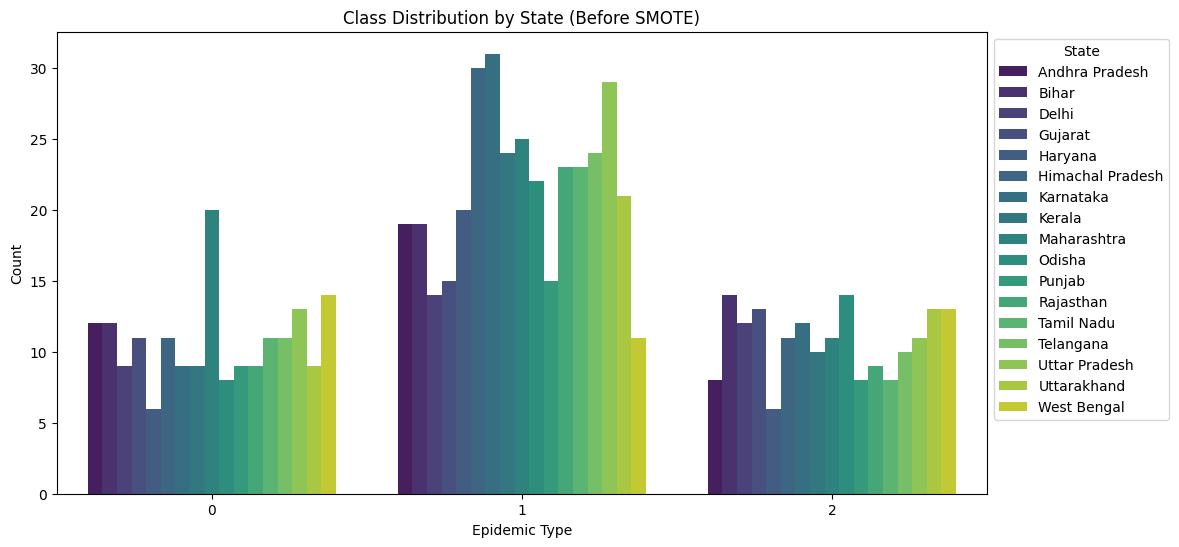

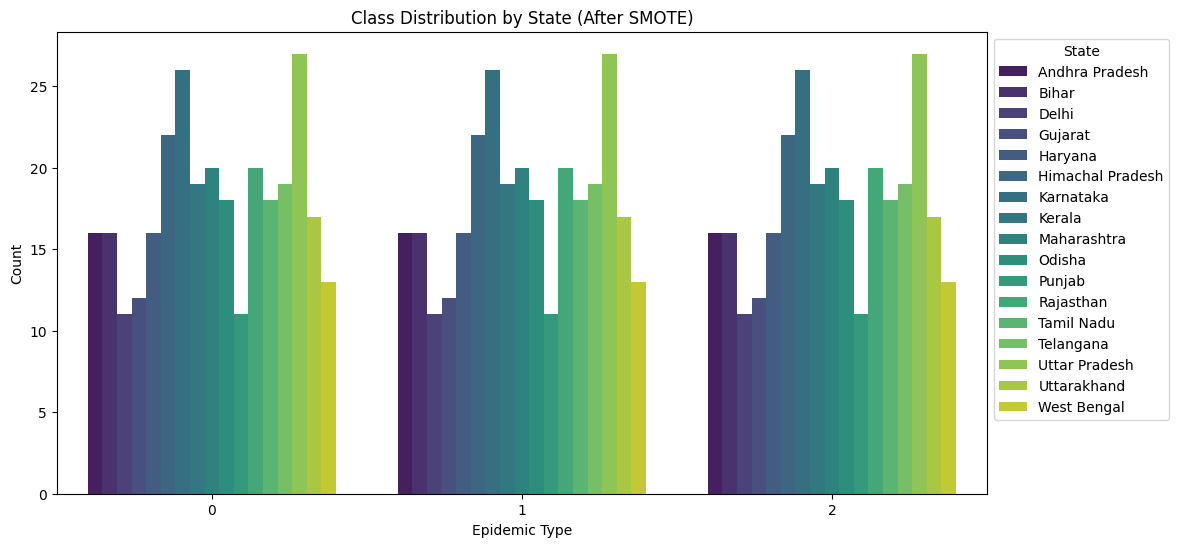

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before SMOTE
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Epidemic_Type', hue='State', palette='viridis')
plt.title('Class Distribution by State (Before SMOTE)')
plt.xlabel('Epidemic Type')
plt.ylabel('Count')
plt.legend(title='State', bbox_to_anchor=(1, 1))
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Initialize lists to collect resampled data for all states
resampled_data = []

# Loop through each state to apply SMOTE and store results
for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]

    if len(state_data) < 10:
        continue  # Skip states with fewer than 10 samples

    # Define features and target
    X = state_data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
                    'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
                    'Infection Rate (%)', 'Healthcare Facilities',
                    'Average Age', 'Urbanization Rate (%)',
                    'Mobility Index', 'Cleanliness Ratio',
                    'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
    y = state_data['Epidemic_Type']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE with dynamic k_neighbors based on the smallest class size
    minority_class_size = y_train.value_counts().min()
    smote = SMOTE(random_state=42, k_neighbors=min(5, minority_class_size - 1))
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Store the resampled data along with the state name
    resampled_data.extend([(state, epidemic_type) for epidemic_type in y_resampled])

# Convert the collected resampled data to a DataFrame for plotting
resampled_df = pd.DataFrame(resampled_data, columns=['State', 'Epidemic_Type'])

# Plot the combined distribution after SMOTE for all states
plt.figure(figsize=(12, 6))
sns.countplot(data=resampled_df, x='Epidemic_Type', hue='State', palette='viridis')
plt.title('Class Distribution by State (After SMOTE)')
plt.xlabel('Epidemic Type')
plt.ylabel('Count')
plt.legend(title='State', bbox_to_anchor=(1, 1))
plt.show()


<ipython-input-33-c52d46226480>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cv_df, x='State', y='Cross-Validation Score', palette='plasma')


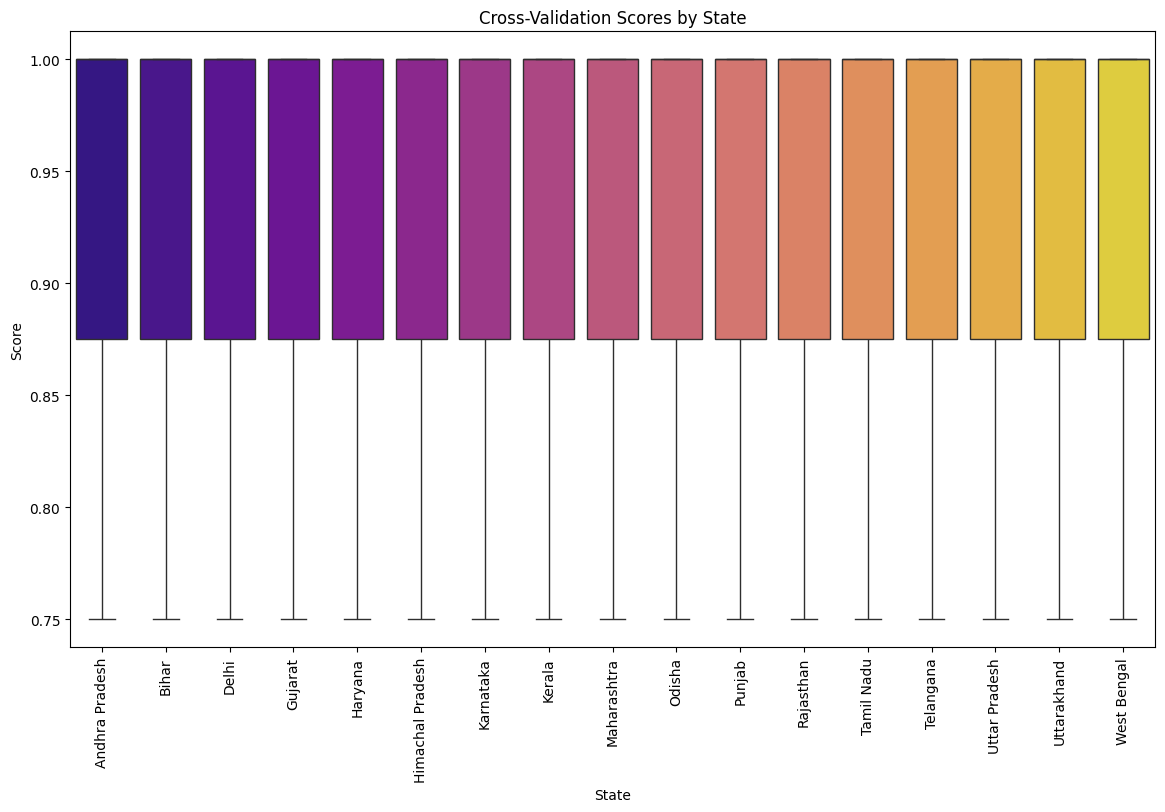

In [ ]:
cv_scores_dict = {}  # Store cross-validation scores per state for visualization

# Assuming cv_scores are stored in a dictionary for each state
for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]
    if len(state_data) < 10:
        continue
    cv_scores_dict[state] = cross_val_score(gb_model, X_resampled, y_resampled, cv=skf)

# Convert to DataFrame for easy plotting
cv_df = pd.DataFrame(cv_scores_dict).melt(var_name='State', value_name='Cross-Validation Score')

plt.figure(figsize=(14, 8))
sns.boxplot(data=cv_df, x='State', y='Cross-Validation Score', palette='plasma')
plt.xticks(rotation=90)
plt.title('Cross-Validation Scores by State')
plt.ylabel('Score')
plt.xlabel('State')
plt.show()


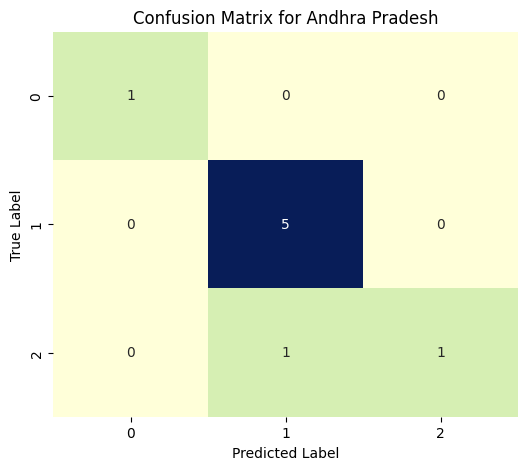

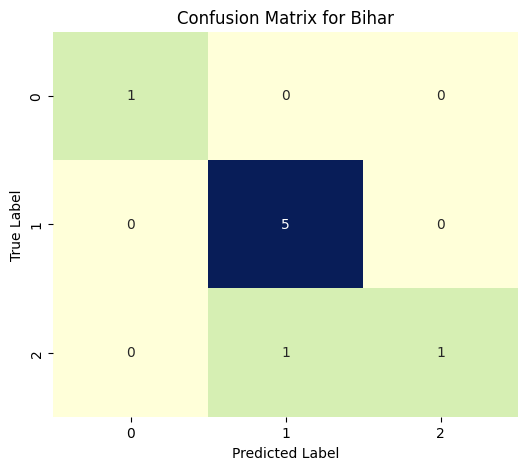

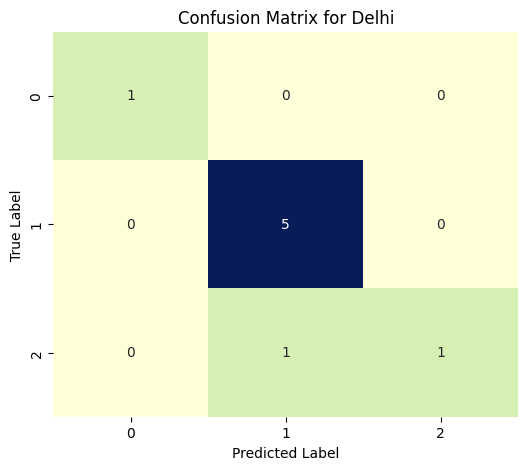

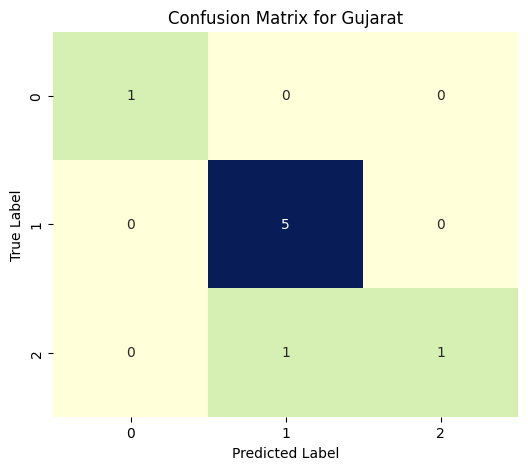

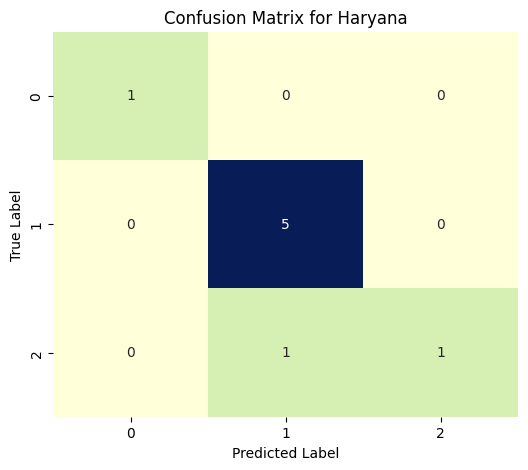

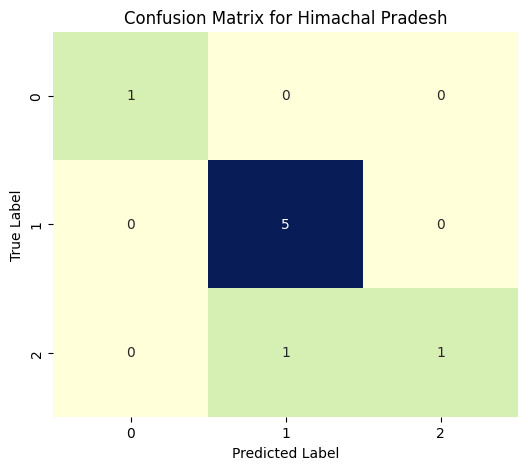

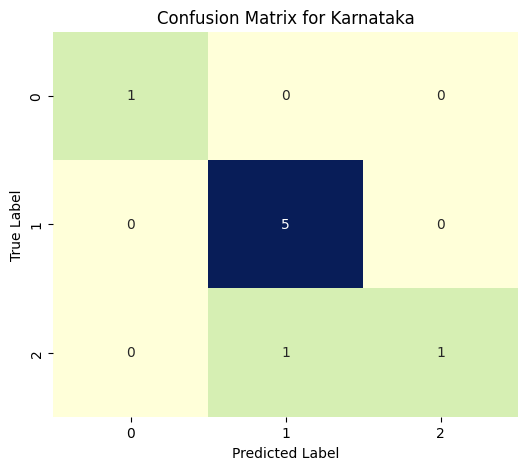

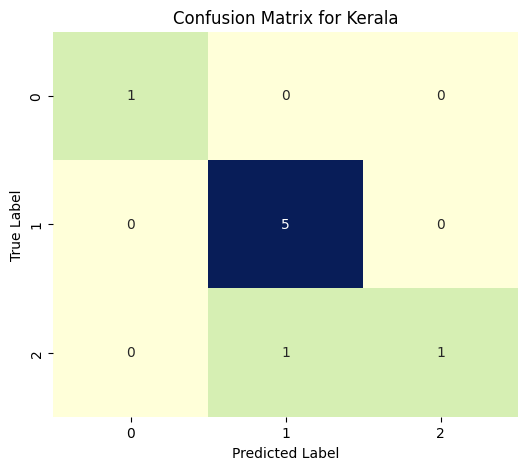

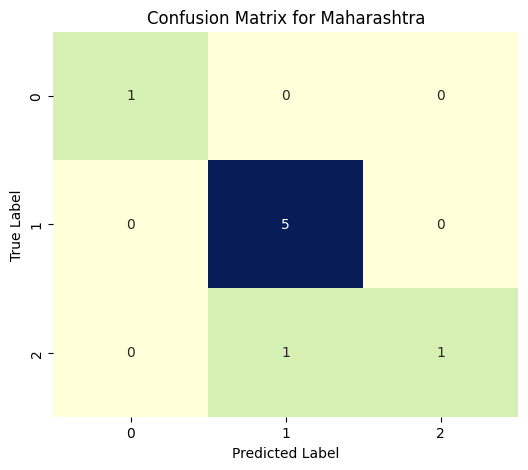

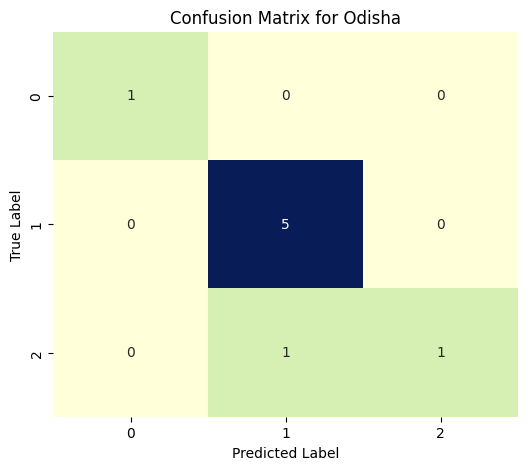

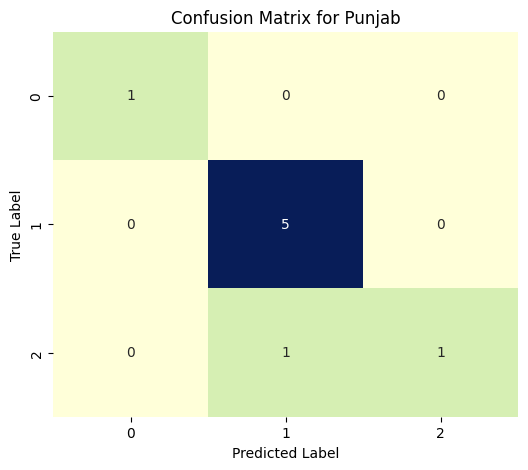

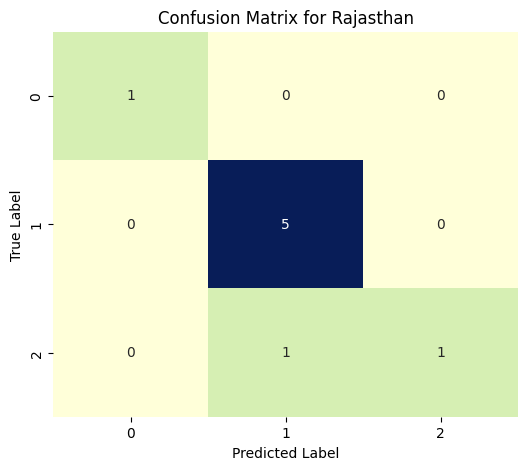

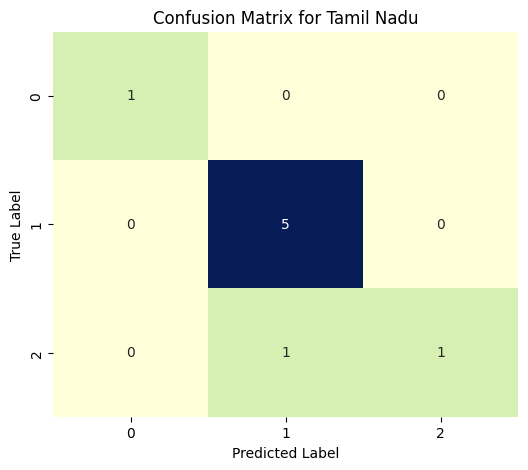

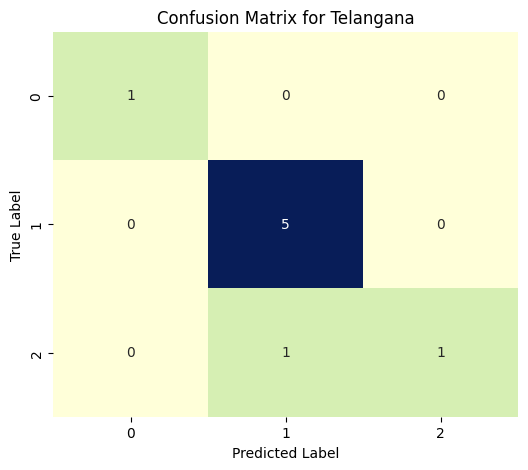

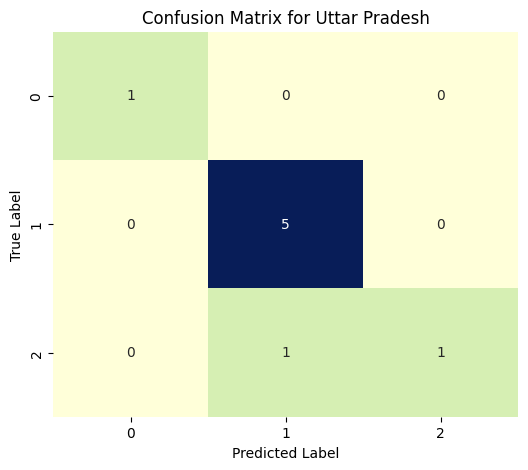

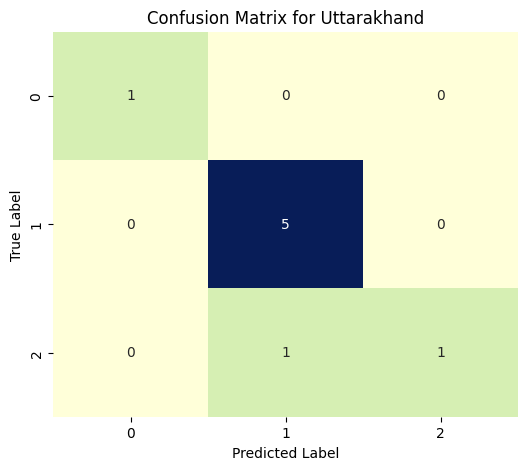

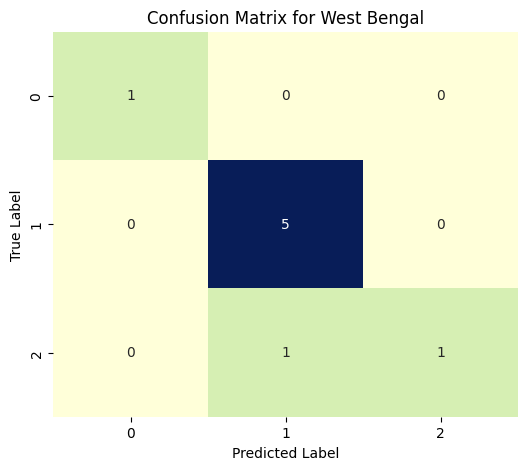

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]
    if len(state_data) < 10:
        continue

    # Fit and predict
    gb_model.fit(X_resampled, y_resampled)
    y_pred_gb = gb_model.predict(X_test)

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred_gb)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
    plt.title(f'Confusion Matrix for {state}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


<ipython-input-35-cd0d2aaf15cb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='coolwarm')


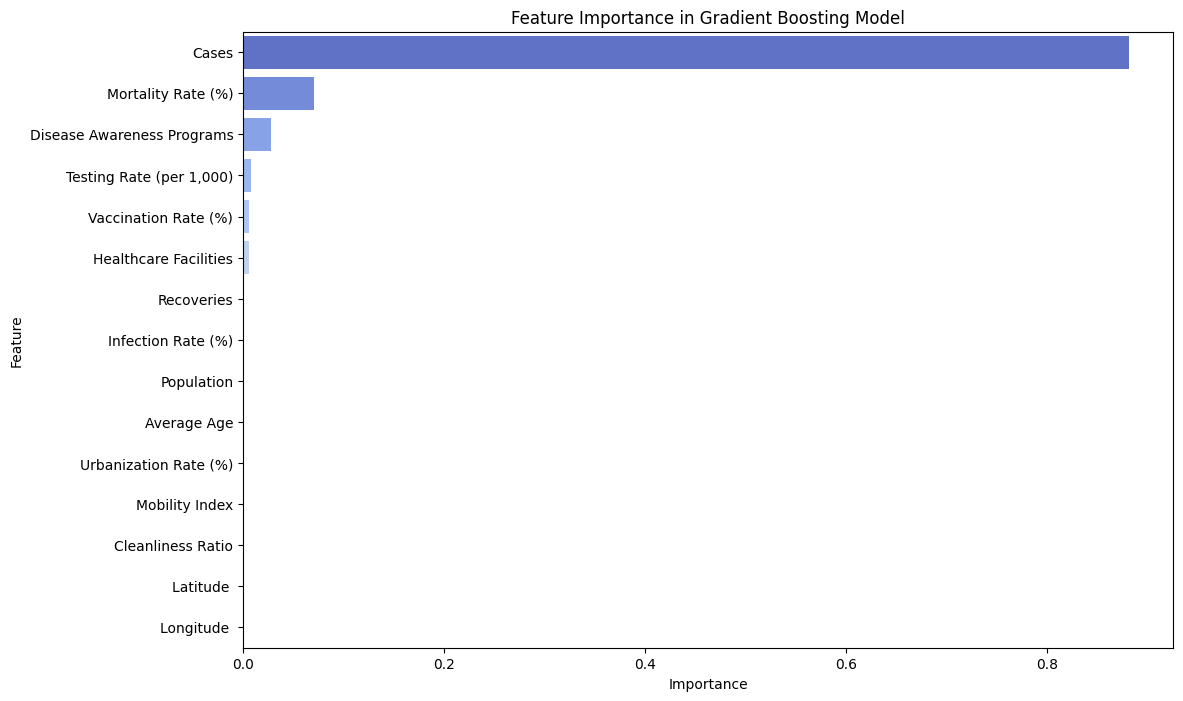

In [ ]:
importances = gb_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='coolwarm')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()


In [ ]:
# Define features, including State, and target
X = state_data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
                'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
                'Infection Rate (%)', 'Healthcare Facilities',
                'Average Age', 'Urbanization Rate (%)',
                'Mobility Index', 'Cleanliness Ratio',
                'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
y = state_data['Epidemic_Type']

# Store the State column separately for test set merging
states = state_data['State']

# Train-test split, setting aside the state column for later use
X_train, X_test, y_train, y_test, states_train, states_test = train_test_split(X, y, states, test_size=0.2, random_state=42)


In [ ]:
# Creating the predicted_data DataFrame
predicted_data = pd.DataFrame({
    'State': states_test.values,
    'Latitude': X_test['Latitude '].values,
    'Longitude': X_test['Longitude '].values,
    'Predicted_Epidemic_Type': y_pred_gb
})


<Figure size 1200x1000 with 0 Axes>

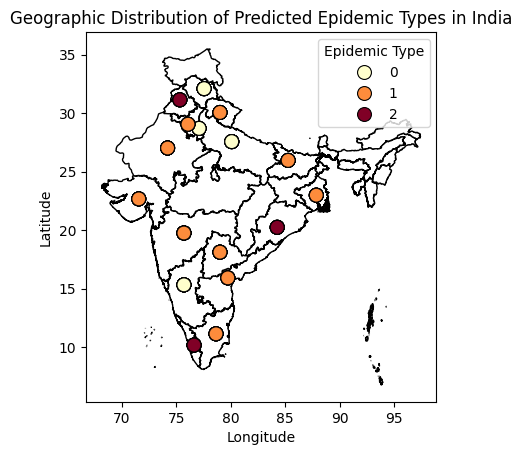

In [ ]:
# Initialize an empty list to collect predictions for all states
all_predictions = []

# Loop through each unique state
for state in data['State'].dropna().unique():
    state_data = data[data['State'] == state]
    if len(state_data) < 10:
        continue  # Skip states with fewer than 10 samples

    # Split and prepare data as before
    X = state_data[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
                    'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
                    'Infection Rate (%)', 'Healthcare Facilities',
                    'Average Age', 'Urbanization Rate (%)',
                    'Mobility Index', 'Cleanliness Ratio',
                    'Disease Awareness Programs', 'Latitude ', 'Longitude ']]
    y = state_data['Epidemic_Type']
    states = state_data['State']
    X_train, X_test, y_train, y_test, states_train, states_test = train_test_split(X, y, states, test_size=0.2, random_state=42)
    # Apply SMOTE with dynamic k_neighbors based on the smallest class size
    minority_class_size = y_train.value_counts().min()
    smote = SMOTE(random_state=42, k_neighbors=min(5, minority_class_size - 1))

# Resample the data
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Apply SMOTE, train model, and make predictions
    _, y_resampled = smote.fit_resample(X_train, y_train)
    gb_model.fit(X_resampled, y_resampled)
    y_pred_gb = gb_model.predict(X_test)

    # Create DataFrame with predictions and append to the list
    state_predictions = pd.DataFrame({
        'State': states_test.values,
        'Latitude': X_test['Latitude '].values,
        'Longitude': X_test['Longitude '].values,
        'Predicted_Epidemic_Type': y_pred_gb
    })
    all_predictions.append(state_predictions)

# Concatenate all state predictions into a single DataFrame
predicted_data = pd.concat(all_predictions, ignore_index=True)
region_map = gpd.read_file("/content/gadm41_IND_1.json")

# Plot the map of India with all predictions
plt.figure(figsize=(12, 10))
base = region_map.plot(color='white', edgecolor='black')
sns.scatterplot(data=predicted_data, x='Longitude', y='Latitude', hue='Predicted_Epidemic_Type',
                palette='YlOrRd', s=100, edgecolor='k', legend='full', ax=base)
plt.title("Geographic Distribution of Predicted Epidemic Types in India")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Epidemic Type')
plt.show()


In [ ]:
import pandas as pd
data=pd.read_csv("/content/epidemic_data_2024.csv")

In [ ]:
data.columns

Index(['State', 'Date', 'Cases', 'Recoveries', 'Mortality Rate (%)',
       'Population', 'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
       'Infection Rate (%)', 'Healthcare Facilities', 'Average Age',
       'Urbanization Rate (%)', 'Mobility Index', 'Cleanliness Ratio',
       'Disease Awareness Programs', 'Latitude ', 'Longitude '],
      dtype='object')

In [ ]:
data.describe(

)


,Cases,Recoveries,Mortality Rate (%),Population,Vaccination Rate (%),"Testing Rate (per 1,000)",Infection Rate (%),Healthcare Facilities,Average Age,Urbanization Rate (%),Mobility Index,Cleanliness Ratio,Disease Awareness Programs,Latitude,Longitude
count,731.000000,731.000000,731.000000,7.310000e+02,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.00000,731.000000,731.000000,731.000000
mean,10491.491108,7930.813953,2.979658,1.093224e+08,70.518618,251.255814,12.701491,353.403557,39.250342,55.786703,0.554624,0.74933,125.121751,22.601586,78.495719
std,5635.801821,4158.763413,1.174549,5.228008e+07,11.398105,87.298803,4.343041,144.640423,11.541182,14.185691,0.256300,0.14814,44.606655,6.721871,3.935215
min,1020.000000,516.000000,1.000000,2.040060e+07,50.100000,100.000000,5.010000,100.000000,20.000000,30.070000,0.100000,0.50000,50.000000,10.163200,71.572400
25%,5486.500000,4271.000000,1.955000,6.551112e+07,60.480000,176.000000,8.995000,232.500000,30.000000,42.975000,0.330000,0.62500,86.000000,18.112400,75.713900
50%,10294.000000,8046.000000,2.950000,1.058204e+08,71.510000,253.000000,12.740000,351.000000,39.000000,56.510000,0.560000,0.74000,124.000000,22.986800,77.561900
75%,15619.500000,11535.500000,4.025000,1.562474e+08,80.270000,331.000000,16.610000,480.000000,50.000000,67.785000,0.760000,0.88000,165.000000,28.704100,79.740000
max,19982.000000,14982.000000,5.000000,1.997032e+08,89.770000,399.000000,20.000000,599.000000,59.000000,79.970000,1.000000,1.00000,199.000000,32.102400,87.855000


Features Used

Cases:

Description: The total number of reported cases for a specific disease.

Role: This feature helps categorize diseases based on their prevalence. Higher case counts often indicate more widespread outbreaks.

Mortality Rate (%):

Description: The percentage of deaths among diagnosed cases of the disease.

Role: This feature is crucial for assessing the severity of a disease. It helps differentiate between diseases with high mortality rates and those with lower rates.

Vaccination Rate (%):

Description: The percentage of the population vaccinated against a specific disease.

Role: This feature is used to identify diseases that are preventable through vaccination, impacting their prevalence and severity.

Healthcare Facilities:


Description: The number of healthcare facilities available per 1000 population.

Role: This feature indicates healthcare access, which can influence disease outcomes and management.

How Features Are Used in the Classification

Case Count Thresholds: Different thresholds of cases help classify diseases into categories like "High" or "Very High" prevalence.

Mortality Rate Ranges: Mortality rates are used to determine the severity of the disease, allowing for classification into groups such as "Low," "Moderate," and "High" mortality.

Vaccination Impact: The vaccination rate is considered, particularly for vaccine-preventable diseases, to assess the potential for outbreaks.

Healthcare Access: The availability of healthcare facilities can affect disease management and outcomes, helping to classify diseases like Tuberculosis.

Summary of Disease Assignments

COVID-19: Very high cases (> 20000).

Cholera: High cases (> 15000) with high mortality (> 4%).

Dengue Fever: High cases (> 10000) with low mortality (< 4%).

Measles: High cases with low mortality (< 2%) and low vaccination rates (< 50%).

Ebola: Low cases (< 2000) with high mortality (> 5%).

Zika Virus: Moderate cases (1000 - 10000) with very low mortality (< 1%).

Tuberculosis: High cases (> 10000) with moderate mortality (≥ 2%).

HIV/AIDS: Very high cases (> 50000).

Hepatitis B: Moderate cases (5000 - 20000) with moderate mortality (≥ 2%).

Typhoid Fever: Moderate cases (5000 - 15000) with low mortality (< 2%).

Meningitis: Moderate cases (2000 - 10000) with high mortality (> 5%).

Leptospirosis: Moderate cases (2000 - 15000) with low to moderate mortality (< 3%).

Yellow Fever: Moderate cases (1000 - 10000) with high mortality (> 5%).

Flu: Default classification for all other cases.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/epidemic_data_2024.csv')

def assign_disease_type(row):
    if row['Cases'] > 20000:
        return 'COVID-19'
    elif row['Cases'] > 15000 and row['Mortality Rate (%)'] > 4:
        return 'Cholera'
    elif row['Cases'] > 10000 and row['Mortality Rate (%)'] < 4:
        return 'Dengue Fever'
    elif row['Cases'] > 10000 and row['Mortality Rate (%)'] < 2 and row['Vaccination Rate (%)'] < 50:
        return 'Measles'
    elif row['Cases'] < 2000 and row['Mortality Rate (%)'] > 5:
        return 'Ebola'
    elif row['Cases'] > 1000 and row['Cases'] < 10000 and row['Mortality Rate (%)'] < 1:
        return 'Zika Virus'
    elif row['Cases'] > 10000 and row['Mortality Rate (%)'] >= 2:
        return 'Tuberculosis (TB)'  # Combined condition for TB
    elif row['Cases'] > 50000:
        return 'HIV/AIDS'
    elif row['Cases'] > 5000 and row['Cases'] < 20000:
        if row['Mortality Rate (%)'] >= 2:
            return 'Hepatitis B'
        else:
            return 'Typhoid Fever'  # Adjusted logic for Typhoid based on mortality
    elif row['Cases'] >= 2000 and row['Cases'] <= 10000:
        if row['Mortality Rate (%)'] > 5:
            return 'Meningitis'
        else:
            return 'Leptospirosis'  # More inclusive for lower mortality rates
    elif row['Cases'] >= 1000 and row['Cases'] <= 10000 and row['Mortality Rate (%)'] > 5:
        return 'Yellow Fever'
    else:
        return 'Flu'

# Apply function to create new col

# Apply function to create new column




# Apply function to create new column
df['Disease_type'] = df.apply(assign_disease_type, axis=1)

df.to_csv('modified_epidemic_data_2024.csv2', index=False)

print(df[['State', 'Date', 'Cases', 'Disease_type']])


              State        Date  Cases       Disease_type
0    Andhra Pradesh  2023-01-13   9785        Hepatitis B
1    Andhra Pradesh  2023-02-14  13443  Tuberculosis (TB)
2    Andhra Pradesh  2023-05-02  16911       Dengue Fever
3    Andhra Pradesh  2023-05-13   2032      Leptospirosis
4    Andhra Pradesh  2023-06-09   4192      Leptospirosis
..              ...         ...    ...                ...
726     West Bengal  2024-10-18  12573       Dengue Fever
727     West Bengal  2024-10-30  18427       Dengue Fever
728     West Bengal  2024-11-12  15598       Dengue Fever
729     West Bengal  2024-12-29   7998        Hepatitis B
730     West Bengal  2024-12-31  19040       Dengue Fever

[731 rows x 4 columns]


In [ ]:

df.Disease_type.unique()

array(['Hepatitis B', 'Tuberculosis (TB)', 'Dengue Fever',
       'Leptospirosis', 'Flu', 'Cholera', 'Typhoid Fever'], dtype=object)

In [ ]:
df.columns

Index(['State', 'Date', 'Cases', 'Recoveries', 'Mortality Rate (%)',
       'Population', 'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
       'Infection Rate (%)', 'Healthcare Facilities', 'Average Age',
       'Urbanization Rate (%)', 'Mobility Index', 'Cleanliness Ratio',
       'Disease Awareness Programs', 'Latitude ', 'Longitude ',
       'Disease_type'],
      dtype='object')

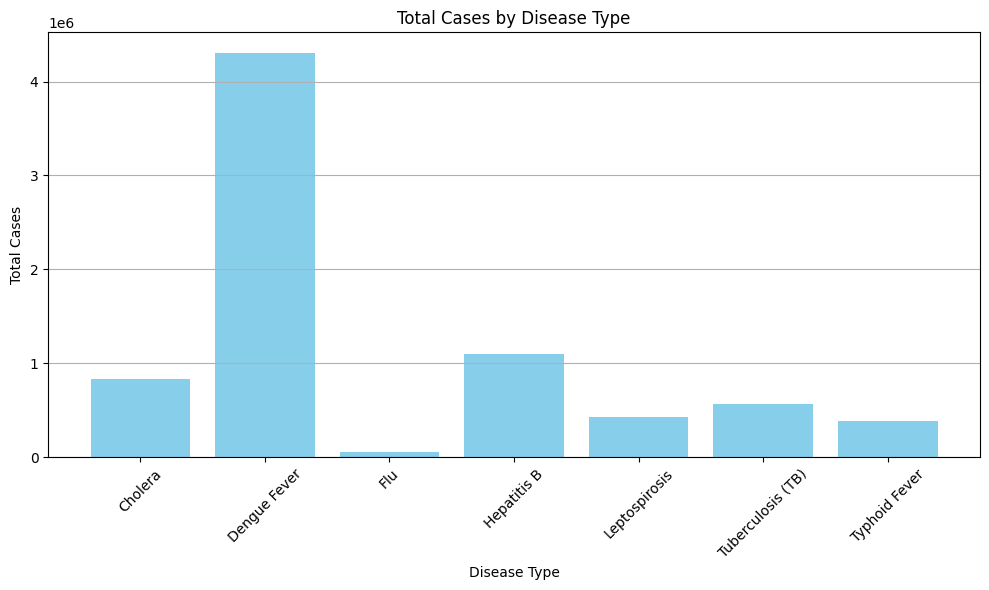

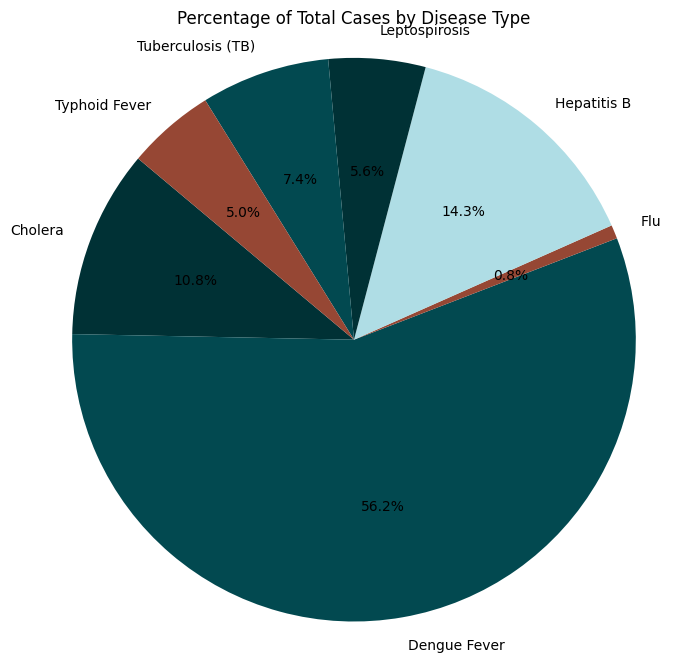

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('modified_epidemic_data_2024.csv2')

# Group by 'Disease Type' and sum the 'Cases'
disease_cases = df.groupby('Disease_type')['Cases'].sum().reset_index()

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(disease_cases['Disease_type'], disease_cases['Cases'], color='skyblue')
plt.title('Total Cases by Disease Type')
plt.xlabel('Disease Type')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

color_palette = ['#003135', '#024950', '#964734','#AFDDE5']

plt.figure(figsize=(8, 8))
plt.pie(disease_cases['Cases'],
        labels=disease_cases['Disease_type'],
        autopct='%1.1f%%',
        startangle=140,
        colors=color_palette)
plt.title('Percentage of Total Cases by Disease Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('pie.png')
plt.show()




In [ ]:
total_cases_per_state = df.groupby('State')['Cases'].sum().reset_index()

# Display the result
for index, row in total_cases_per_state.iterrows():
    print(f"In {row['State']}, the total number of cases is {row['Cases']}.")

In Andhra Pradesh, the total number of cases is 388745.
In Bihar, the total number of cases is 481343.
In Delhi, the total number of cases is 388702.
In Gujarat, the total number of cases is 431700.
In Haryana, the total number of cases is 332568.
In Himachal Pradesh, the total number of cases is 533841.
In Karnataka, the total number of cases is 569246.
In Kerala, the total number of cases is 464457.
In Maharashtra, the total number of cases is 503320.
In Odisha, the total number of cases is 502867.
In Punjab, the total number of cases is 326258.
In Rajasthan, the total number of cases is 404569.
In Tamil Nadu, the total number of cases is 438275.
In Telangana, the total number of cases is 488705.
In Uttar Pradesh, the total number of cases is 552390.
In Uttarakhand, the total number of cases is 487137.
In West Bengal, the total number of cases is 375157.


In [ ]:
state_disease_counts = df.groupby(['State', 'Disease_type'])['Cases'].sum().reset_index()

# Find the most prevalent disease in each state
most_prevalent_disease = state_disease_counts.loc[state_disease_counts.groupby('State')['Cases'].idxmax()]

# Display the result
for index, row in most_prevalent_disease.iterrows():
    print(f"In {row['State']}, the most prevalent disease is '{row['Disease_type']}' with {row['Cases']} cases.")


In Andhra Pradesh, the most prevalent disease is 'Dengue Fever' with 220019 cases.
In Bihar, the most prevalent disease is 'Dengue Fever' with 236403 cases.
In Delhi, the most prevalent disease is 'Dengue Fever' with 242600 cases.
In Gujarat, the most prevalent disease is 'Dengue Fever' with 288915 cases.
In Haryana, the most prevalent disease is 'Dengue Fever' with 235904 cases.
In Himachal Pradesh, the most prevalent disease is 'Dengue Fever' with 212661 cases.
In Karnataka, the most prevalent disease is 'Dengue Fever' with 294591 cases.
In Kerala, the most prevalent disease is 'Dengue Fever' with 242260 cases.
In Maharashtra, the most prevalent disease is 'Dengue Fever' with 261999 cases.
In Odisha, the most prevalent disease is 'Dengue Fever' with 314552 cases.
In Punjab, the most prevalent disease is 'Cholera' with 94249 cases.
In Rajasthan, the most prevalent disease is 'Dengue Fever' with 211175 cases.
In Tamil Nadu, the most prevalent disease is 'Dengue Fever' with 215425 cases

In [ ]:
df.columns

Index(['State', 'Date', 'Cases', 'Recoveries', 'Mortality Rate (%)',
       'Population', 'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
       'Infection Rate (%)', 'Healthcare Facilities', 'Average Age',
       'Urbanization Rate (%)', 'Mobility Index', 'Cleanliness Ratio',
       'Disease Awareness Programs', 'Latitude ', 'Longitude ',
       'Disease_type'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df is already defined and contains the necessary features

# Define features and target variable
X = df[['Cases', 'Recoveries', 'Mortality Rate (%)', 'Population',
         'Vaccination Rate (%)', 'Testing Rate (per 1,000)',
         'Infection Rate (%)', 'Healthcare Facilities', 'Average Age',
         'Urbanization Rate (%)', 'Mobility Index', 'Cleanliness Ratio',
         'Disease Awareness Programs', 'Latitude ', 'Longitude ']]  # Features

# Assuming you have a binary target variable 'Risk Level' (1 for high risk, 0 for low risk)
y = df['Disease_type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Predict risk for all states in the original dataset
df['Predicted Disease Type'] = model.predict(X)

# Display predicted risks for each state
for index, row in df.iterrows():
    print(f"In {row['State']}, the predicted disease type is: {row['Predicted Disease Type']}.")


Confusion Matrix:
[[11  0  0  0  0  0  0]
 [ 0 60  0  0  0  0  0]
 [ 0  0  1  0  9  0  0]
 [ 0  0  0 31  0  0  0]
 [ 0  0  0  0 19  0  0]
 [ 1  0  0  0  0  4  0]
 [ 0  0  0  0  0  0 11]]

Classification Report:
                   precision    recall  f1-score   support

          Cholera       0.92      1.00      0.96        11
     Dengue Fever       1.00      1.00      1.00        60
              Flu       1.00      0.10      0.18        10
      Hepatitis B       1.00      1.00      1.00        31
    Leptospirosis       0.68      1.00      0.81        19
Tuberculosis (TB)       1.00      0.80      0.89         5
    Typhoid Fever       1.00      1.00      1.00        11

         accuracy                           0.93       147
        macro avg       0.94      0.84      0.83       147
     weighted avg       0.95      0.93      0.91       147

In Andhra Pradesh, the predicted disease type is: Hepatitis B.
In Andhra Pradesh, the predicted disease type is: Tuberculosis (TB).
In An

In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing 'State' and 'Disease_type' columns

# Count occurrences of each disease in each state
disease_counts = df.groupby(['State', 'Disease_type']).size().reset_index(name='Count')

# Identify the most common disease for each state
most_common_disease = disease_counts.loc[disease_counts.groupby('State')['Count'].idxmax()]

# Display results
for index, row in most_common_disease.iterrows():
    print(f"In {row['State']}, the most common disease is: {row['Disease_type']} with {row['Count']} occurrences.")


In Andhra Pradesh, the most common disease is: Dengue Fever with 14 occurrences.
In Bihar, the most common disease is: Dengue Fever with 14 occurrences.
In Delhi, the most common disease is: Dengue Fever with 15 occurrences.
In Gujarat, the most common disease is: Dengue Fever with 18 occurrences.
In Haryana, the most common disease is: Dengue Fever with 16 occurrences.
In Himachal Pradesh, the most common disease is: Dengue Fever with 14 occurrences.
In Karnataka, the most common disease is: Dengue Fever with 19 occurrences.
In Kerala, the most common disease is: Dengue Fever with 16 occurrences.
In Maharashtra, the most common disease is: Dengue Fever with 17 occurrences.
In Odisha, the most common disease is: Dengue Fever with 21 occurrences.
In Punjab, the most common disease is: Dengue Fever with 6 occurrences.
In Rajasthan, the most common disease is: Dengue Fever with 14 occurrences.
In Tamil Nadu, the most common disease is: Dengue Fever with 14 occurrences.
In Telangana, the m

In [ ]:
from collections import defaultdict, Counter

# Initialize a dictionary to hold counts for each state
state_disease_counts = defaultdict(Counter)

# Define the predictions for each state based on your provided data
predictions = {
    "Andhra Pradesh": [
        "Hepatitis B", "Tuberculosis (TB)", "Dengue Fever", "Leptospirosis", "Leptospirosis",
        "Dengue Fever", "Dengue Fever", "Tuberculosis (TB)", "Hepatitis B", "Dengue Fever",
        "Leptospirosis", "Dengue Fever", "Dengue Fever", "Hepatitis B", "Hepatitis B",
        "Flu", "Hepatitis B", "Leptospirosis", "Dengue Fever", "Leptospirosis",
        "Hepatitis B", "Hepatitis B", "Hepatitis B", "Hepatitis B", "Leptospirosis",
        "Leptospirosis", "Dengue Fever", "Hepatitis B", "Hepatitis B", "Dengue Fever",
        "Dengue Fever", "Dengue Fever", "Dengue Fever", "Dengue Fever", "Hepatitis B",
        "Tuberculosis (TB)", "Hepatitis B", "Dengue Fever", "Cholera", "Dengue Fever"
    ],
    "Bihar": [
        "Hepatitis B", "Leptospirosis", "Cholera", "Dengue Fever", "Cholera",
        "Dengue Fever", "Dengue Fever", "Flu", "Tuberculosis (TB)", "Hepatitis B",
        "Cholera", "Typhoid Fever", "Dengue Fever", "Typhoid Fever", "Hepatitis B",
        "Dengue Fever", "Dengue Fever", "Dengue Fever", "Dengue Fever", "Leptospirosis",
        "Dengue Fever", "Dengue Fever", "Leptospirosis", "Typhoid Fever", "Hepatitis B",
        "Leptospirosis", "Leptospirosis", "Dengue Fever", "Leptospirosis", "Hepatitis B",
        "Dengue Fever", "Tuberculosis (TB)", "Leptospirosis", "Hepatitis B", "Cholera",
        "Tuberculosis (TB)", "Tuberculosis (TB)", "Leptospirosis", "Dengue Fever",
        "Leptospirosis", "Cholera", "Typhoid Fever", "Leptospirosis", "Dengue Fever",
        "Flu", "Dengue Fever", "Leptospirosis", "Hepatitis B", "Leptospirosis",
        "Dengue Fever", "Dengue Fever"

    ],
    "Delhi": [
      "Dengue Fever", "Dengue Fever", "Leptospirosis", "Hepatitis B", "Dengue Fever",
      "Leptospirosis", "Typhoid Fever", "Dengue Fever", "Dengue Fever", "Dengue Fever",
      "Dengue Fever", "Typhoid Fever", "Flu", "Dengue Fever", "Tuberculosis (TB)",
      "Tuberculosis (TB)", "Dengue Fever", "Dengue Fever", "Dengue Fever", "Leptospirosis",
      "Hepatitis B", "Dengue Fever", "Cholera", "Dengue Fever", "Hepatitis B",
      "Leptospirosis", "Tuberculosis (TB)", "Dengue Fever", "Dengue Fever",
      "Tuberculosis (TB)", "Leptospirosis", "Hepatitis B", "Cholera", "Leptospirosis",
      "Leptospirosis"

    ],
    "Gujarat": [
       "Dengue Fever", "Dengue Fever", "Cholera", "Leptospirosis", "Dengue Fever",
       "Typhoid Fever", "Dengue Fever", "Dengue Fever", "Leptospirosis", "Leptospirosis",
       "Leptospirosis", "Leptospirosis", "Cholera", "Dengue Fever", "Typhoid Fever",
       "Leptospirosis", "Hepatitis B", "Hepatitis B", "Dengue Fever", "Leptospirosis",
       "Leptospirosis", "Hepatitis B", "Dengue Fever", "Flu", "Dengue Fever",
       "Dengue Fever", "Dengue Fever", "Dengue Fever", "Dengue Fever", "Hepatitis B",
       "Leptospirosis", "Cholera", "Hepatitis B", "Dengue Fever", "Dengue Fever",
       "Dengue Fever", "Dengue Fever", "Dengue Fever"

    ],
    "Haryana": [
        "Hepatitis B", "Dengue Fever", "Dengue Fever", "Dengue Fever", "Tuberculosis (TB)",
        "Typhoid Fever", "Hepatitis B", "Dengue Fever", "Hepatitis B", "Typhoid Fever",
        "Hepatitis B", "Dengue Fever", "Dengue Fever", "Leptospirosis", "Dengue Fever",
        "Dengue Fever", "Dengue Fever", "Flu", "Dengue Fever", "Hepatitis B",
        "Hepatitis B", "Leptospirosis", "Flu", "Dengue Fever", "Leptospirosis",
        "Dengue Fever", "Dengue Fever", "Dengue Fever", "Dengue Fever", "Leptospirosis",
        "Hepatitis B", "Dengue Fever", "Hepatitis B"

    ],
    "Himachal Pradesh": [
       "Hepatitis B", "Leptospirosis", "Leptospirosis", "Dengue Fever", "Hepatitis B",
       "Typhoid Fever", "Dengue Fever", "Typhoid Fever", "Dengue Fever", "Hepatitis B",
       "Dengue Fever", "Tuberculosis (TB)", "Hepatitis B", "Flu", "Leptospirosis",
       "Hepatitis B", "Flu", "Flu", "Tuberculosis (TB)", "Dengue Fever", "Hepatitis B",
       "Dengue Fever", "Dengue Fever", "Dengue Fever", "Hepatitis B", "Tuberculosis (TB)",
       "Tuberculosis (TB)", "Cholera", "Typhoid Fever", "Tuberculosis (TB)",
       "Typhoid Fever", "Hepatitis B", "Dengue Fever", "Dengue Fever", "Dengue Fever",
       "Cholera", "Leptospirosis", "Dengue Fever", "Leptospirosis", "Hepatitis B",
       "Cholera", "Typhoid Fever", "Cholera", "Hepatitis B", "Typhoid Fever",
       "Leptospirosis", "Typhoid Fever", "Dengue Fever", "Cholera", "Hepatitis B",
       "Dengue Fever", "Hepatitis B"

    ],
    "Karnataka": [
       "Tuberculosis (TB)", "Dengue Fever", "Leptospirosis", "Typhoid Fever", "Hepatitis B",
       "Dengue Fever", "Dengue Fever", "Hepatitis B", "Leptospirosis", "Dengue Fever",
       "Typhoid Fever", "Leptospirosis", "Typhoid Fever", "Leptospirosis", "Hepatitis B",
       "Cholera", "Dengue Fever", "Typhoid Fever", "Hepatitis B", "Cholera",
       "Hepatitis B", "Flu", "Dengue Fever", "Dengue Fever", "Typhoid Fever",
       "Dengue Fever", "Hepatitis B", "Leptospirosis", "Dengue Fever", "Typhoid Fever",
       "Dengue Fever", "Dengue Fever", "Cholera", "Dengue Fever", "Dengue Fever",
      "Tuberculosis (TB)", "Dengue Fever", "Dengue Fever", "Tuberculosis (TB)",
      "Tuberculosis (TB)", "Dengue Fever", "Dengue Fever", "Hepatitis B",
       "Hepatitis B", "Leptospirosis", "Dengue Fever", "Hepatitis B",
       "Tuberculosis (TB)", "Hepatitis B", "Dengue Fever", "Dengue Fever",
      "Hepatitis B", "Leptospirosis"

    ],
    "Kerala": [
       "Dengue Fever", "Cholera", "Hepatitis B", "Hepatitis B", "Tuberculosis (TB)",
       "Dengue Fever", "Dengue Fever", "Leptospirosis", "Dengue Fever", "Dengue Fever",
       "Cholera", "Leptospirosis", "Hepatitis B", "Dengue Fever", "Dengue Fever",
       "Dengue Fever", "Hepatitis B", "Leptospirosis", "Dengue Fever", "Hepatitis B",
      "Leptospirosis", "Cholera", "Hepatitis B", "Leptospirosis", "Hepatitis B",
      "Hepatitis B", "Dengue Fever", "Dengue Fever", "Dengue Fever", "Dengue Fever",
      "Hepatitis B", "Hepatitis B", "Leptospirosis", "Leptospirosis", "Dengue Fever",
      "Dengue Fever", "Hepatitis B", "Tuberculosis (TB)", "Leptospirosis",
      "Hepatitis B", "Hepatitis B", "Dengue Fever", "Hepatitis B",
      "Hepatitis B", "Dengue Fever"

    ],
    "Maharashtra":[
        "Leptospirosis", "Dengue Fever", "Dengue Fever", "Dengue Fever", "Leptospirosis",
        "Leptospirosis", "Hepatitis B", "Leptospirosis", "Tuberculosis (TB)", "Dengue Fever",
        "Leptospirosis", "Leptospirosis", "Dengue Fever", "Cholera", "Dengue Fever",
        "Hepatitis B", "Tuberculosis (TB)", "Dengue Fever", "Leptospirosis", "Leptospirosis",
        "Hepatitis B", "Dengue Fever", "Typhoid Fever", "Leptospirosis", "Leptospirosis",
        "Hepatitis B", "Hepatitis B", "Leptospirosis", "Leptospirosis", "Tuberculosis (TB)",
        "Leptospirosis", "Hepatitis B", "Hepatitis B", "Dengue Fever", "Flu",
        "Leptospirosis", "Hepatitis B", "Dengue Fever", "Leptospirosis", "Cholera",
        "Dengue Fever", "Dengue Fever", "Flu", "Hepatitis B", "Dengue Fever",
        "Hepatitis B", "Hepatitis B", "Typhoid Fever", "Hepatitis B", "Dengue Fever",
        "Leptospirosis", "Hepatitis B", "Leptospirosis", "Dengue Fever", "Dengue Fever",
        "Dengue Fever"

    ],
    "Odisha":[
        "Hepatitis B", "Hepatitis B", "Dengue Fever", "Dengue Fever", "Leptospirosis",
        "Dengue Fever", "Hepatitis B", "Dengue Fever", "Cholera", "Dengue Fever",
       "Flu", "Dengue Fever", "Hepatitis B", "Cholera", "Leptospirosis",
       "Dengue Fever", "Dengue Fever", "Typhoid Fever", "Dengue Fever", "Hepatitis B",
       "Leptospirosis", "Dengue Fever", "Hepatitis B", "Dengue Fever", "Dengue Fever",
       "Dengue Fever", "Leptospirosis", "Dengue Fever", "Hepatitis B", "Cholera",
       "Typhoid Fever", "Dengue Fever", "Dengue Fever", "Leptospirosis",
       "Cholera", "Leptospirosis", "Dengue Fever", "Dengue Fever", "Flu",
       "Dengue Fever", "Tuberculosis (TB)", "Hepatitis B", "Dengue Fever",
       "Dengue Fever", "Dengue Fever"

    ],
    "Punjab":[
        "Hepatitis B", "Leptospirosis", "Hepatitis B", "Tuberculosis (TB)", "Leptospirosis",
        "Hepatitis B", "Cholera", "Dengue Fever", "Hepatitis B", "Dengue Fever",
        "Flu", "Dengue Fever", "Cholera", "Leptospirosis", "Dengue Fever",
        "Flu", "Hepatitis B", "Typhoid Fever", "Typhoid Fever", "Cholera",
        "Tuberculosis (TB)", "Tuberculosis (TB)", "Leptospirosis", "Leptospirosis",
       "Dengue Fever", "Cholera", "Leptospirosis", "Flu", "Dengue Fever",
       "Typhoid Fever", "Cholera", "Tuberculosis (TB)"

    ],
    "Rajasthan":[
        "Dengue Fever", "Dengue Fever", "Typhoid Fever", "Dengue Fever", "Dengue Fever",
        "Dengue Fever", "Dengue Fever", "Typhoid Fever", "Typhoid Fever", "Hepatitis B",
        "Hepatitis B", "Tuberculosis (TB)", "Flu", "Flu", "Hepatitis B",
        "Hepatitis B", "Leptospirosis", "Hepatitis B", "Dengue Fever", "Cholera",
        "Dengue Fever", "Typhoid Fever", "Typhoid Fever", "Dengue Fever", "Flu",
        "Dengue Fever", "Cholera", "Hepatitis B", "Typhoid Fever", "Hepatitis B",
        "Hepatitis B", "Leptospirosis", "Typhoid Fever", "Leptospirosis",
        "Hepatitis B", "Dengue Fever", "Hepatitis B", "Dengue Fever", "Hepatitis B",
        "Dengue Fever", "Dengue Fever"

    ],
    "Tamil Nadu":[
        "Dengue Fever", "Tuberculosis (TB)", "Leptospirosis", "Leptospirosis", "Leptospirosis",
        "Dengue Fever", "Dengue Fever", "Dengue Fever", "Dengue Fever", "Dengue Fever",
        "Dengue Fever", "Leptospirosis", "Cholera", "Hepatitis B", "Leptospirosis",
        "Hepatitis B", "Dengue Fever", "Hepatitis B", "Leptospirosis", "Leptospirosis",
        "Typhoid Fever", "Flu", "Tuberculosis (TB)", "Dengue Fever", "Tuberculosis (TB)",
        "Hepatitis B", "Hepatitis B", "Dengue Fever", "Leptospirosis", "Dengue Fever",
        "Tuberculosis (TB)", "Typhoid Fever", "Dengue Fever", "Tuberculosis (TB)",
        "Leptospirosis", "Typhoid Fever", "Dengue Fever", "Tuberculosis (TB)",
        "Hepatitis B", "Hepatitis B"

    ],
    "Telegana":[
        "Leptospirosis", "Dengue Fever", "Flu", "Dengue Fever", "Dengue Fever",
        "Hepatitis B", "Dengue Fever", "Dengue Fever", "Dengue Fever", "Dengue Fever",
        "Dengue Fever", "Leptospirosis", "Hepatitis B", "Hepatitis B", "Typhoid Fever",
        "Leptospirosis", "Cholera", "Dengue Fever", "Dengue Fever", "Hepatitis B",
        "Leptospirosis", "Flu", "Leptospirosis", "Dengue Fever", "Dengue Fever",
        "Hepatitis B", "Dengue Fever", "Dengue Fever", "Hepatitis B", "Typhoid Fever",
        "Dengue Fever", "Dengue Fever", "Dengue Fever", "Hepatitis B", "Tuberculosis (TB)",
        "Dengue Fever", "Leptospirosis", "Hepatitis B", "Hepatitis B", "Dengue Fever",
        "Hepatitis B", "Dengue Fever"

    ],
    "Uttar Pradesh":[
        "Cholera", "Hepatitis B", "Dengue Fever", "Leptospirosis", "Dengue Fever",
        "Leptospirosis", "Dengue Fever", "Hepatitis B", "Dengue Fever", "Dengue Fever",
        "Dengue Fever", "Dengue Fever", "Cholera", "Leptospirosis", "Dengue Fever",
        "Typhoid Fever", "Hepatitis B", "Dengue Fever", "Cholera", "Leptospirosis",
        "Dengue Fever", "Hepatitis B", "Hepatitis B", "Hepatitis B", "Dengue Fever",
        "Dengue Fever", "Typhoid Fever", "Tuberculosis (TB)", "Typhoid Fever",
        "Typhoid Fever", "Leptospirosis", "Hepatitis B", "Flu", "Dengue Fever",
        "Hepatitis B", "Dengue Fever",

    ],
    "Uttarakhand":[
        "Dengue Fever", "Hepatitis B", "Dengue Fever", "Hepatitis B", "Dengue Fever",
        "Dengue Fever", "Dengue Fever", "Dengue Fever", "Dengue Fever", "Dengue Fever",
        "Leptospirosis", "Hepatitis B", "Leptospirosis", "Dengue Fever", "Typhoid Fever",
        "Dengue Fever", "Dengue Fever", "Cholera", "Dengue Fever", "Dengue Fever",
        "Flu", "Leptospirosis", "Dengue Fever", "Dengue Fever", "Typhoid Fever",
        "Hepatitis B", "Hepatitis B", "Dengue Fever", "Cholera", "Dengue Fever",
        "Leptospirosis", "Dengue Fever", "Hepatitis B", "Dengue Fever", "Hepatitis B",
        "Dengue Fever", "Leptospirosis", "Leptospirosis", "Dengue Fever", "Typhoid Fever",
        "Dengue Fever", "Dengue Fever", "Dengue Fever"

    ],
    "West Bengal":[
        "Leptospirosis", "Typhoid Fever", "Hepatitis B", "Leptospirosis", "Typhoid Fever",
        "Typhoid Fever", "Dengue Fever", "Leptospirosis", "Leptospirosis", "Flu",
        "Dengue Fever", "Dengue Fever", "Leptospirosis", "Tuberculosis (TB)", "Hepatitis B",
        "Dengue Fever", "Tuberculosis (TB)", "Hepatitis B", "Leptospirosis", "Cholera",
        "Dengue Fever", "Dengue Fever", "Cholera", "Dengue Fever", "Dengue Fever",
        "Leptospirosis", "Flu", "Dengue Fever", "Hepatitis B", "Leptospirosis",
        "Cholera", "Flu", "Leptospirosis", "Dengue Fever", "Dengue Fever",
        "Dengue Fever", "Hepatitis B", "Dengue Fever"

    ]

}

# Count occurrences of each disease for each state
for state, diseases in predictions.items():
    state_disease_counts[state] = Counter(diseases)

# Output the results
for state, diseases in state_disease_counts.items():
    print(f"\nIn {state}, the predicted diseases are:")
    for disease, count in diseases.items():
        print(f"{disease}: {count}")



In Andhra Pradesh, the predicted diseases are:
Hepatitis B: 13
Tuberculosis (TB): 3
Dengue Fever: 15
Leptospirosis: 7
Flu: 1
Cholera: 1

In Bihar, the predicted diseases are:
Hepatitis B: 7
Leptospirosis: 12
Cholera: 5
Dengue Fever: 17
Flu: 2
Tuberculosis (TB): 4
Typhoid Fever: 4

In Delhi, the predicted diseases are:
Dengue Fever: 15
Leptospirosis: 7
Hepatitis B: 4
Typhoid Fever: 2
Flu: 1
Tuberculosis (TB): 4
Cholera: 2

In Gujarat, the predicted diseases are:
Dengue Fever: 18
Cholera: 3
Leptospirosis: 9
Typhoid Fever: 2
Hepatitis B: 5
Flu: 1

In Haryana, the predicted diseases are:
Hepatitis B: 8
Dengue Fever: 16
Tuberculosis (TB): 1
Typhoid Fever: 2
Leptospirosis: 4
Flu: 2

In Himachal Pradesh, the predicted diseases are:
Hepatitis B: 12
Leptospirosis: 6
Dengue Fever: 14
Typhoid Fever: 7
Tuberculosis (TB): 5
Flu: 3
Cholera: 5

In Karnataka, the predicted diseases are:
Tuberculosis (TB): 5
Dengue Fever: 20
Leptospirosis: 7
Typhoid Fever: 6
Hepatitis B: 11
Cholera: 3
Flu: 1

In Keral